# **PROYECTO FINAL FUNDAMENTOS DE ANALÍTICA I**


Integrantes:
1. Yazmin Johana Garcia
2. Javier Ricardo Muñoz
3. Andrés Felipe Ocampo
4. Yesid Humberto Montaño

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import LabelEncoder
import missingno as msno
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.cluster import KMeans
from xgboost import XGBClassifier
import xgboost as xgb
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectPercentile, chi2
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import sklearn.metrics as skm
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, cohen_kappa_score
from sklearn.dummy import DummyClassifier

In [2]:
df=pd.read_csv("Train.csv")

# **PUNTO 1. Análisis de estructura, de calidad y EDA (Exploratory Data Analysis)**

## 1.1. Estructura de los datos

In [3]:
df.shape

(8068, 11)

El dataset está compuesto por 8068 registros y 11 atributos (variables).

### 1.1.1. Análisis de variables cualitativas

In [4]:
df.select_dtypes(exclude="number").head()

,Gender,Ever_Married,Graduated,Profession,Spending_Score,Var_1,Segmentation
0,Male,No,No,Healthcare,Low,Cat_4,D
1,Female,Yes,Yes,Engineer,Average,Cat_4,A
2,Female,Yes,Yes,Engineer,Low,Cat_6,B
3,Male,Yes,Yes,Lawyer,High,Cat_6,B
4,Female,Yes,Yes,Entertainment,High,Cat_6,A


In [5]:
df.describe(exclude="number")

,Gender,Ever_Married,Graduated,Profession,Spending_Score,Var_1,Segmentation
count,8068,7928,7990,7944,8068,7992,8068
unique,2,2,2,9,3,7,4
top,Male,Yes,Yes,Artist,Low,Cat_6,D
freq,4417,4643,4968,2516,4878,5238,2268


Por otro lado, el dataset está compuesto por 7 variables de tipo cualitativa. De las 7 variables, 3 (Gender, Ever_Married y Graduated) son variables de tipo binaria (tienen solo 2 clases) mientras que 4 (Profession, Spending_Score, Var_1 y Segmentation) son variables multiclase (tienen más de 2 clases). 

Algunas de estas variables tienen conteos de registros menores a la longitud total del dataset (8068) lo que anticipa la presencia de valores nulos en estas variables, problema que será revisado y corregido posteriormente.

### 1.1.2. Análisis de variables numéricas

In [6]:
df.describe(include="number")

,ID,Age,Work_Experience,Family_Size
count,8068.000000,8068.000000,7239.000000,7733.000000
mean,463479.214551,43.466906,2.641663,2.850123
std,2595.381232,16.711696,3.406763,1.531413
min,458982.000000,18.000000,0.000000,1.000000
25%,461240.750000,30.000000,0.000000,2.000000
50%,463472.500000,40.000000,1.000000,3.000000
75%,465744.250000,53.000000,4.000000,4.000000
max,467974.000000,89.000000,14.000000,9.000000


El dataset está compuesto por 3 variables tipo cuantitativas. La variable ID NO es una variable cuantitativa realmente, sino una variable cualitativa (nominal). En este caso Python la está interpretando incorrectamente. Esto se corregirá en pasos posteriores. 

Por otro lado, al igual que en el caso de las variables cualitativas, algunas de estas variables cuantitativas tienen conteos de registros menores a la longitud total del dataset (8068) lo que anticipa la presencia de valores nulos en estas variables, problema que será revisado y corregido posteriormente.

Por último, en todas las distribuciones de las variables cuantitativas se evidencian distribuciones asimétricas, aunque es preciso decir que la asimetría es más notable en unas variables que en otras. Tal es el caso de la variable Work_Experience, la cual tiene una media de 2.6 mientras que su mediana es 1, estos valores se encuentran relativamente alejados. En este caso, dado que la media supera a la mediana, se tiene para esta variable una distribución con asimetría hacia la derecha por la presencia de una cantidad de personas con registro de posibles atípicos de años de experiencia. En el caso de las variables Age y Family_Size también sucede que sus valores de medias superan a sus valores de medianas, aunque las asimetrías de sus distribuciones pudieran no ser tan pronunciadas como en el caso de Work_Experience, dado que no existe demasiada diferencia entre las dos medidas de tendencia central.

## 1.2. Análisis de Calidad de Datos

### 1.2.1. Valores Nulos

<Axes: >

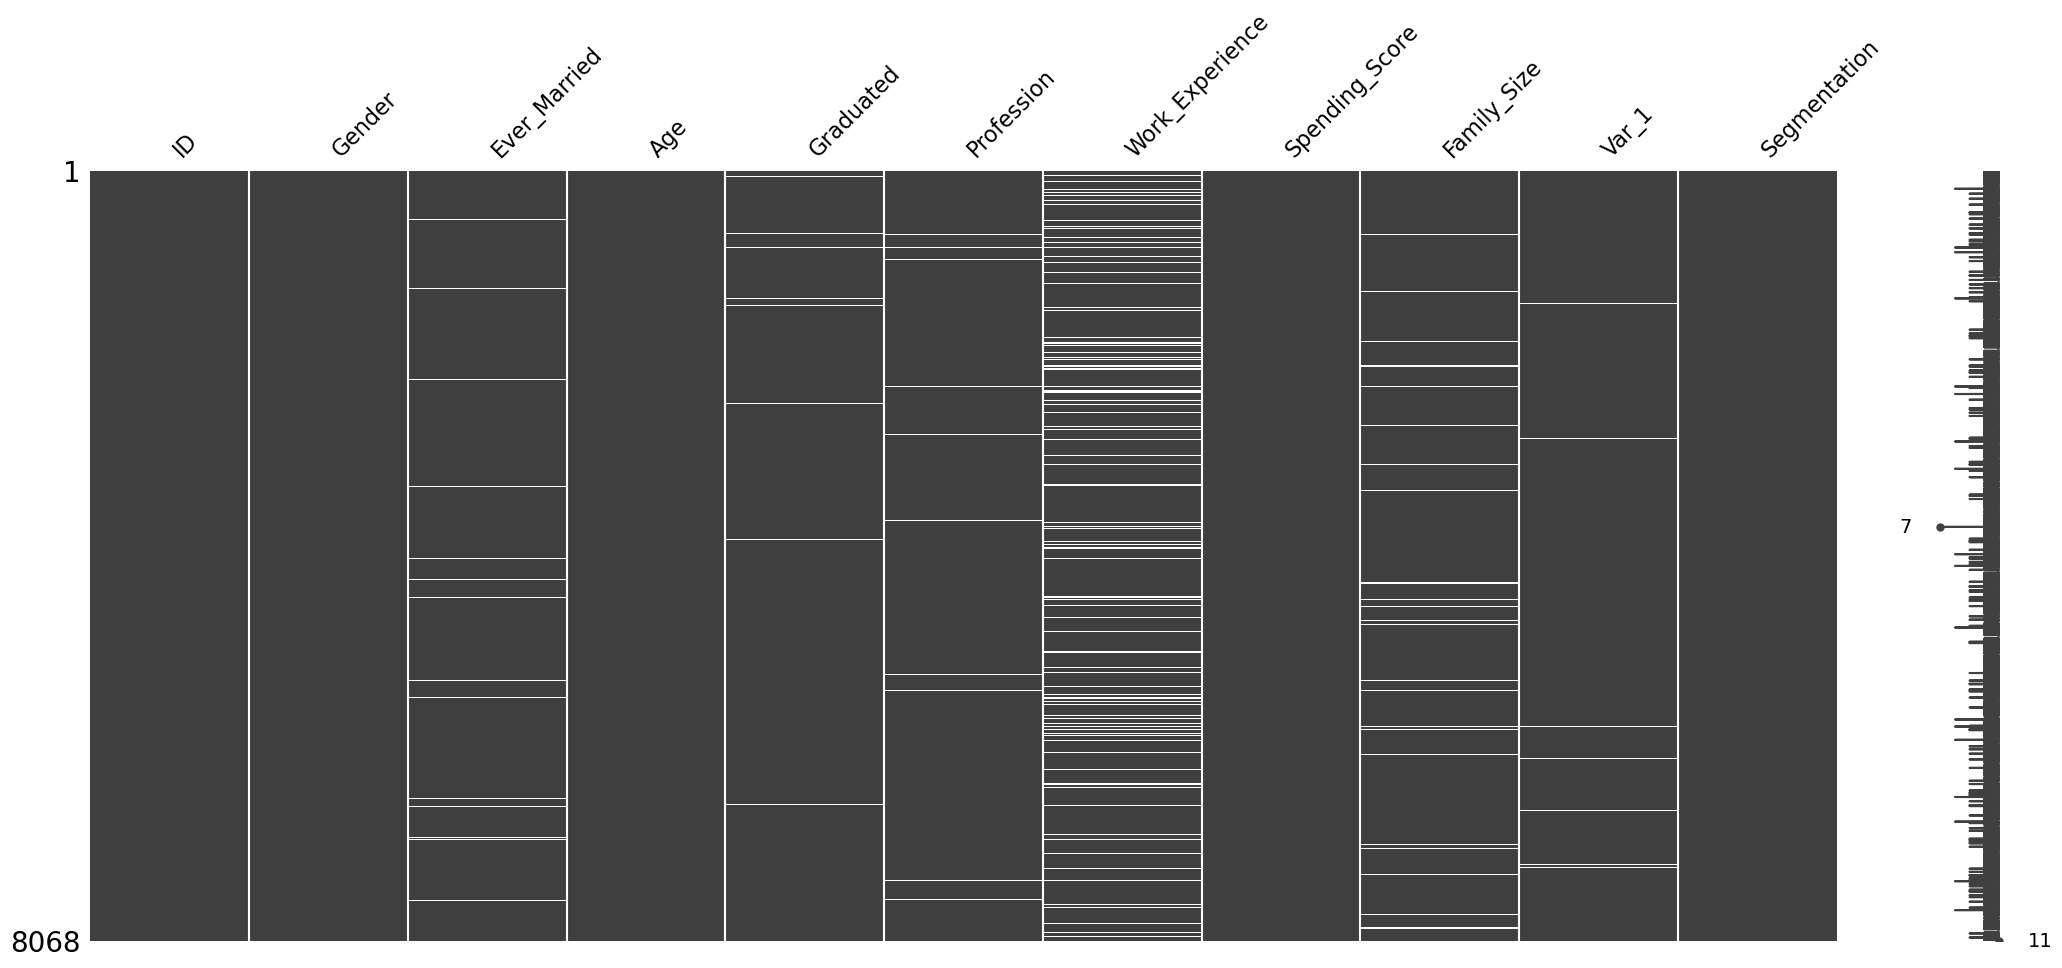

In [7]:
msno.matrix(df)

En la gráfica anterior se puede apreciar ya de forma más evidente lo discutido en la sección de estructura de datos y es la presencia de valores nulos. En este caso las siguientes son las variables que presentan valores nulos: Ever_Married, Graduated, Profession, Work_Experience, Family_Size y Var_1. La variable Work_Experience es la que presenta un mayor número de valores nulos, seguida por la variable Family_Size. 

<Axes: >

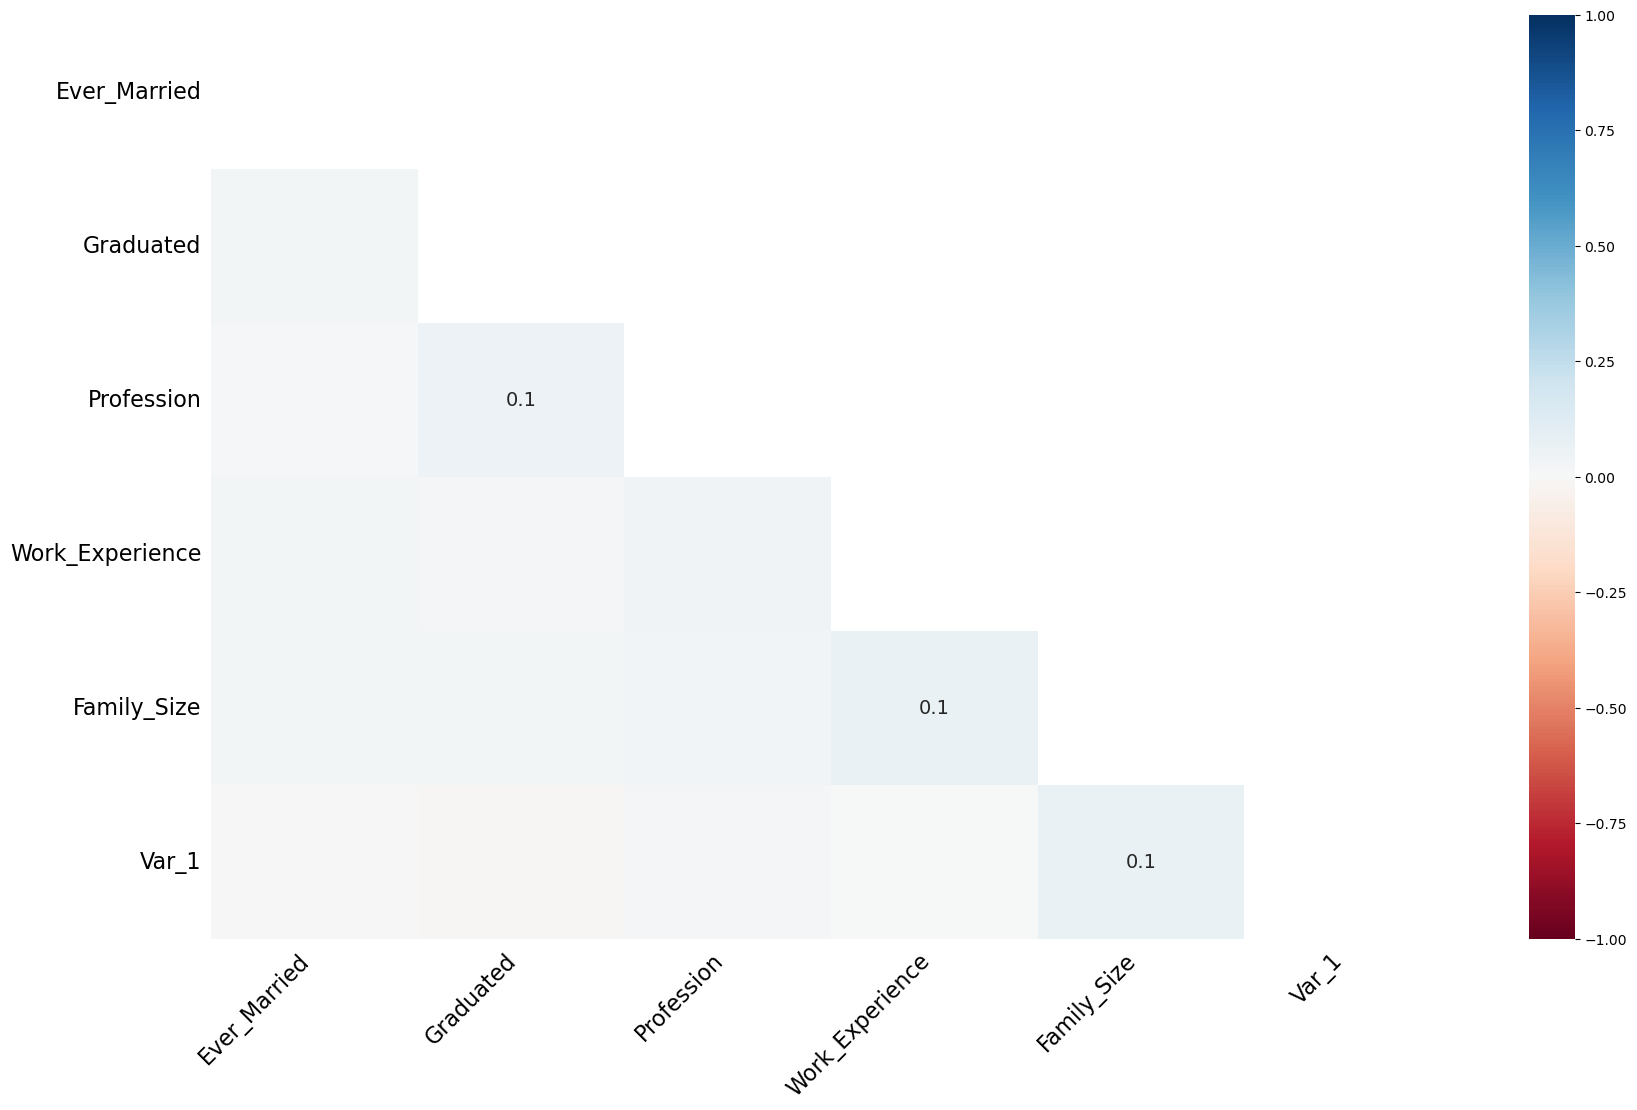

In [8]:
msno.heatmap(df)

En la gráfica anterior se puede evidenciar la correlación existente entre los valores nulos de aquellas variables que presentan valores faltantes. Se detectan correlaciones de valores nulos entre algunas variables, sin embargo, es preciso anotar que estas correlaciones son débiles (iguales a 0.1). Estas correlaciones ayudan a saber si el hecho de que exista un valor faltante en una variable está correlacionado con la existencia de un valor faltante en otra variable. Este hallazgo es relevante pues, el hecho de que esta correlación sea tan débil aquí, indica que la presencia de valores nulos en las variables podría ser aleatorio y no presenta algún patrón. Así las cosas, se puede trabajar con el supuesto de que los valores nulos son aleatorios. 

<Axes: title={'center': 'Porcentaje de valores faltantes por variable'}, ylabel='Ratio de valores faltantes'>

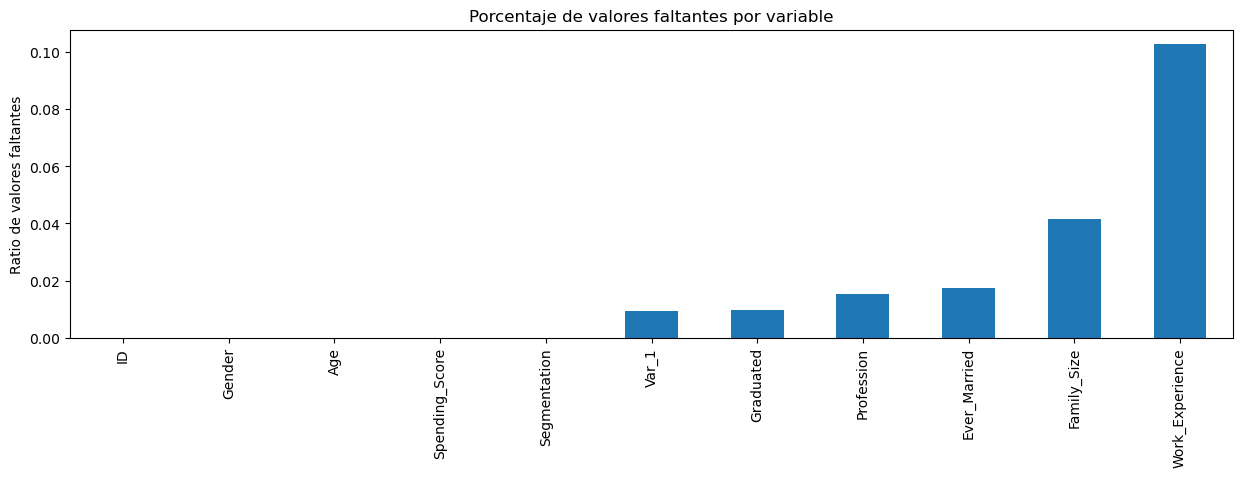

In [9]:
df.isna().mean().sort_values().plot(
    kind="bar", figsize=(15, 4),
    title="Porcentaje de valores faltantes por variable",
    ylabel="Ratio de valores faltantes")

En el gráfico se puede evidenciar que la variable Work_Experience es la que presenta mayor presencia de valores nulos con cerca de un 10%, seguido de Family Size con cerca de un 4%. El resto de variables tienen menos de 2% de valores nulos o no tienen valores nulos.

Después de analizar el fenómeno de valores nulos en este dataset, se propone hacer una imputación de valores nulos en cada una de las variables, cualitativas y cuantitativas. Para realizar esta imputación se utilizará la función iterative_imputer de scikit learn, la cual permite realizar una imputación iterativa de las variables, utilizando el estimador por defecto para variables numéricas de esta función (Bayesian Ridge) y el algoritmo de KNN Clasificador en el caso de variables cualitativas. 

En un primer momento se hará la imputación multivariante de las variables cuantitativas que presentan valores nulos, Work_Experience y Family_Size. En esta imputación se incluye otra variable cuantitativa que no tiene valores nulos y que es Age. En este caso, se propone una imputación multivariante, y no una univariante (imputando media o mediana), puesto que los años de experiencia y el tamaño de la familia podrían estar correlacionados con la edad de la persona. En otros términos, no tendría sentido que, por ejemplo, una persona con una edad muy baja, tenga muchos años de experiencia.

In [10]:
# Crea el algoritmo de Iterative Imputer con una semilla de 45 y un máximo de iteraciones de 20

imputer_cuanti = IterativeImputer(random_state=45, max_iter=20)

# Se escoge del dataset únicamente las variables cuantitativas

Train_imput_cuanti = df.loc[:, [ 'Age','Work_Experience', 'Family_Size']]

# Se ajustan las observaciones

imputer_cuanti.fit(Train_imput_cuanti)

# Se realiza la imputación

Train_imputado_cuanti=imputer_cuanti.transform(Train_imput_cuanti)

# Se confirma la no presencia de nulos en el dataset

Train_imputado_cuanti_final=pd.DataFrame(Train_imputado_cuanti, columns=["Age","Work_Experience","Family_Size"])
Train_imputado_cuanti_final["Age"]=Train_imputado_cuanti_final["Age"].astype(int)
Train_imputado_cuanti_final["Work_Experience"]=Train_imputado_cuanti_final["Work_Experience"].round().astype(int)
Train_imputado_cuanti_final["Family_Size"]=Train_imputado_cuanti_final["Family_Size"].round().astype(int)

nulos = Train_imputado_cuanti_final.isnull().sum()
total = len(Train_imputado_cuanti_final)
columns=Train_imputado_cuanti_final.columns

for col in columns:
    porc_nulos = round(100 * nulos[col] / total, 2)
    print(f'Porcentaje de nulos en {col}: {porc_nulos}%')

Porcentaje de nulos en Age: 0.0%
Porcentaje de nulos en Work_Experience: 0.0%
Porcentaje de nulos en Family_Size: 0.0%


A través de todo el código anterior se realizó la imputación multivariante de valores nulos para las variables Work_Experience y Family_Size. Se confirma que estas variables no tienen ya valores faltantes. Tal como se indicó con anterioridad, se procederá con la imputación (también multivariante) de nulos para las variables cualitativas. En este caso, para esta imputación, se utilizarán también las variables cuantitativas del dataset a razón de que no tienen ya valores faltantes, y pueden aportar a la imputación multivariante.

In [11]:
# Se crea primero el dataset que se utilizará en la imputación

Train_imput_cuali = df.loc[:, ['Gender', 'Ever_Married', 'Graduated','Profession','Spending_Score','Var_1','Segmentation']]
Train_imput_cuali_cuanti_final = pd.concat([Train_imput_cuali, Train_imputado_cuanti_final], axis=1)

# Convertir variables cualitativas a numéricas
variables_cualitativas = ["Gender", "Ever_Married", "Graduated", "Profession", "Spending_Score", "Var_1", "Segmentation"]
le_dict = {}
for var in variables_cualitativas:
    null_mask = Train_imput_cuali_cuanti_final[var].isnull()
    le = LabelEncoder()
    Train_imput_cuali_cuanti_final.loc[~null_mask, var] = le.fit_transform(Train_imput_cuali_cuanti_final.loc[~null_mask, var].astype(str))
    le_dict[var] = le
    Train_imput_cuali_cuanti_final.loc[null_mask, var] = np.nan

# Se crea el algoritmo de KNN para utilizarlo después como estimador en el el Iterative Imputer

KNN_Clasificador=KNeighborsClassifier(n_neighbors=5)
imputer_cuali = IterativeImputer(random_state=45, max_iter=20, estimator=KNN_Clasificador)

# Se ajustan las observaciones

imputer_cuali.fit(Train_imput_cuali_cuanti_final)

# Se realiza la imputación

Train_imputado_final=imputer_cuali.transform(Train_imput_cuali_cuanti_final)

# Se crea el dataframe final con la imputación

columnas=Train_imput_cuali_cuanti_final.columns
df_imputado_final=pd.DataFrame(Train_imputado_final, columns=columnas)
df_imputado_final["Age"]=df_imputado_final["Age"].astype(int)
df_imputado_final["Work_Experience"]=df_imputado_final["Work_Experience"].round().astype(int)
df_imputado_final["Family_Size"]=df_imputado_final["Family_Size"].round().astype(int)

# Convertir variables numéricas a cualitativas
for var in variables_cualitativas:
    df_imputado_final[var] = le_dict[var].inverse_transform(df_imputado_final[var].round().astype(int))

# Se añade la variable "ID" que no fue utilizada en los procesos de imputación (no era necesaria para ello)
df_ID=pd.DataFrame(df["ID"], columns=["ID"])
df_train_final=pd.concat([df_ID,df_imputado_final], axis=1)
df_train_final

# Verificación de eliminación de nulos
porcentaje_nulos = df_train_final.isnull().mean() * 100
porcentaje_nulos

C:\Windows\Temp\ipykernel_25576\1005335365.py:12: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  Train_imput_cuali_cuanti_final.loc[~null_mask, var] = le.fit_transform(Train_imput_cuali_cuanti_final.loc[~null_mask, var].astype(str))
C:\Windows\Temp\ipykernel_25576\1005335365.py:12: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  Train_imput_cuali_cuanti_final.loc[~null_mask, var] = le.fit_transform(Train_imput_cuali_cuanti_final.loc[~null_mask, var].astype(str))
C:\Windows\Temp\ipykernel_25576\1005335365.py:12: DeprecationWarning: In a future 

ID                 0.0
Gender             0.0
Ever_Married       0.0
Graduated          0.0
Profession         0.0
Spending_Score     0.0
Var_1              0.0
Segmentation       0.0
Age                0.0
Work_Experience    0.0
Family_Size        0.0
dtype: float64

A partir de la información arrojada con anterioridad, se confirma la imputación multivariante exitosa para todas las variables cualitativas. Así las cosas, todo el dataset se encuentra libre de valores nulos.

### 1.2.2. Corrección de tipos de variables

### Variables cualitativas

- ID
- Gender
- Ever_Married
- Graduated
- Profession
- Spending_Score
- Family_Size
- Var_1
- Segmentation

### Variables cuantitativas

- Age
- Work_Experience
- Family_Size

In [12]:
df_train_final.info(all)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   ID               8068 non-null   int64 
 1   Gender           8068 non-null   object
 2   Ever_Married     8068 non-null   object
 3   Graduated        8068 non-null   object
 4   Profession       8068 non-null   object
 5   Spending_Score   8068 non-null   object
 6   Var_1            8068 non-null   object
 7   Segmentation     8068 non-null   object
 8   Age              8068 non-null   int32 
 9   Work_Experience  8068 non-null   int32 
 10  Family_Size      8068 non-null   int32 
dtypes: int32(3), int64(1), object(7)
memory usage: 598.9+ KB


A partir de la tabla anterior, se encuentra que Python está detectando mal el tipo de variable para una variable: ID. Esta variable no es tipo integer, pues no es un entero (variable cuantitativa), en cambio, es un identificador de una observación por lo que debería ser tipo object. Se procede a realizar el cambio. También se aporvecha para redondear los valores de la variable Family_Size y cambiarlo a tipo integer.

In [13]:
df_train_final["ID"]=df_train_final["ID"].astype(str)
df_train_final["Family_Size"]=df_train_final["Family_Size"].round().astype(int)

In [14]:
df_train_final.info(all)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   ID               8068 non-null   object
 1   Gender           8068 non-null   object
 2   Ever_Married     8068 non-null   object
 3   Graduated        8068 non-null   object
 4   Profession       8068 non-null   object
 5   Spending_Score   8068 non-null   object
 6   Var_1            8068 non-null   object
 7   Segmentation     8068 non-null   object
 8   Age              8068 non-null   int32 
 9   Work_Experience  8068 non-null   int32 
 10  Family_Size      8068 non-null   int32 
dtypes: int32(3), object(8)
memory usage: 598.9+ KB


Se confirma el cambio de tipo de variable a object de la variable ID.

### 1.2.3. Valores inválidos

In [15]:
df_train_final["Gender"].value_counts()

Male      4417
Female    3651
Name: Gender, dtype: int64

In [16]:
df_train_final["Ever_Married"].value_counts()

Yes    4714
No     3354
Name: Ever_Married, dtype: int64

In [17]:
df_train_final["Graduated"].value_counts()

Yes    5017
No     3051
Name: Graduated, dtype: int64

In [18]:
df_train_final["Profession"].value_counts()

Artist           2566
Healthcare       1358
Entertainment     963
Engineer          707
Doctor            697
Lawyer            631
Executive         603
Marketing         294
Homemaker         249
Name: Profession, dtype: int64

In [19]:
df_train_final["Spending_Score"].value_counts()

Low        4878
Average    1974
High       1216
Name: Spending_Score, dtype: int64

In [20]:
df_train_final["Segmentation"].value_counts()

D    2268
A    1972
C    1970
B    1858
Name: Segmentation, dtype: int64

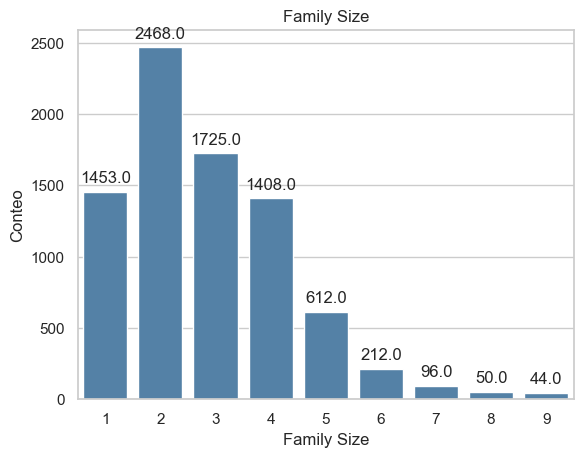

In [21]:
sns.set(style="whitegrid")
ax = sns.countplot(x='Family_Size', data=df_train_final, color="steelblue")
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.xlabel('Family Size')
plt.ylabel('Conteo')
plt.title('Family Size')
plt.show()

<Axes: xlabel='Age', ylabel='Count'>

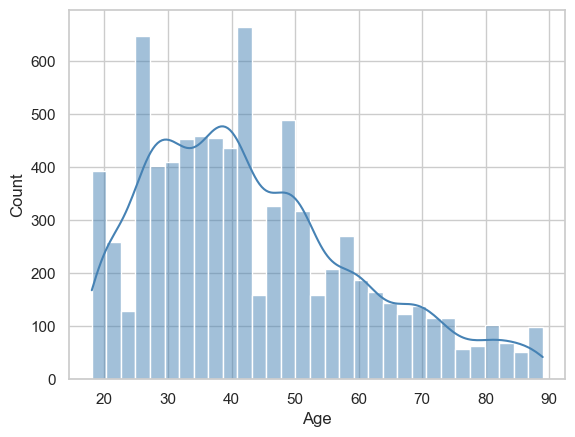

In [22]:
sns.histplot(df_train_final["Age"], kde=True, color="steelblue")

<Axes: xlabel='Work_Experience', ylabel='Count'>

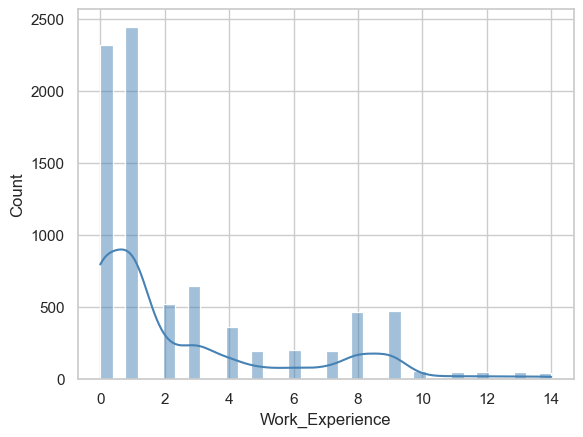

In [23]:
sns.histplot(df_train_final["Work_Experience"], kde=True, color="steelblue")

A partir del análisis anterior se concluye que todas las variables presentan valores válidos. En el caso de las variables cualitativas, todos los valores únicos se ajustan a la naturaleza de las variables. En el caso de las variables cuantitativas, se considera también que todos los valores son válidos (aunque existan posibles atípicos que se revisarán más adelante).

### 1.2.4. Detección y limpieza de outliers

Text(0, 0.5, 'Frecuencia')

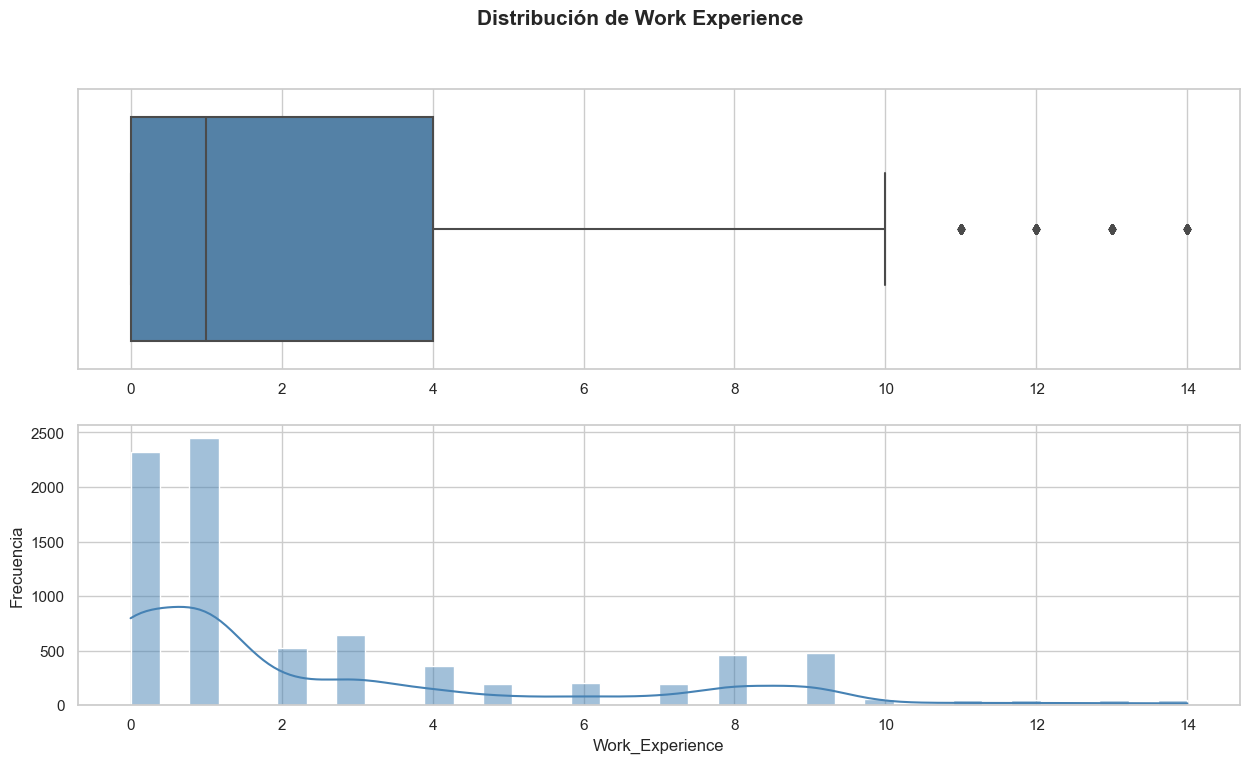

In [24]:
fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(15, 8))
fig.suptitle("Distribución de Work Experience",fontsize=15, fontweight='bold')

plt.subplot(2,1,1)
ax=sns.boxplot(x=df_train_final['Work_Experience'],color="steelblue")
plt.xlabel("")

plt.subplot(2,1,2)
ax=sns.histplot(x=df_train_final['Work_Experience'],kde=True,color="steelblue")
plt.ylabel("Frecuencia")

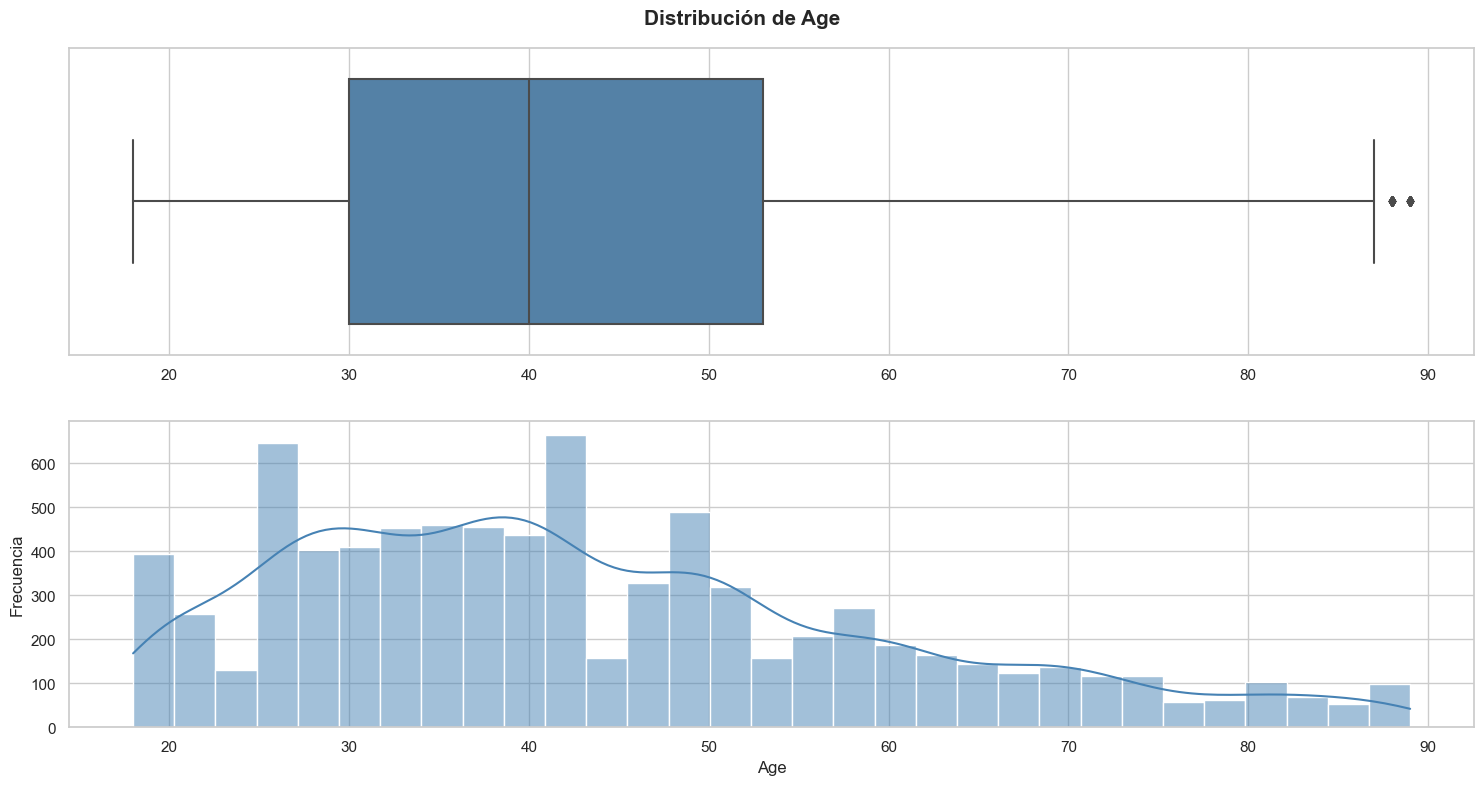

In [25]:
fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(15, 8))
fig.suptitle("Distribución de Age", fontsize=15, fontweight='bold')

# Primer subgráfico
plt.subplot(2, 1, 1)
sns.boxplot(x=df_train_final['Age'], color="steelblue")
plt.xlabel(" ")

# Segundo subgráfico
plt.subplot(2, 1, 2)
sns.histplot(x=df_train_final['Age'], kde=True, color="steelblue")
plt.ylabel("Frecuencia")

# Ajuste de diseño
plt.tight_layout()
plt.show()

Text(0, 0.5, 'Frecuencia')

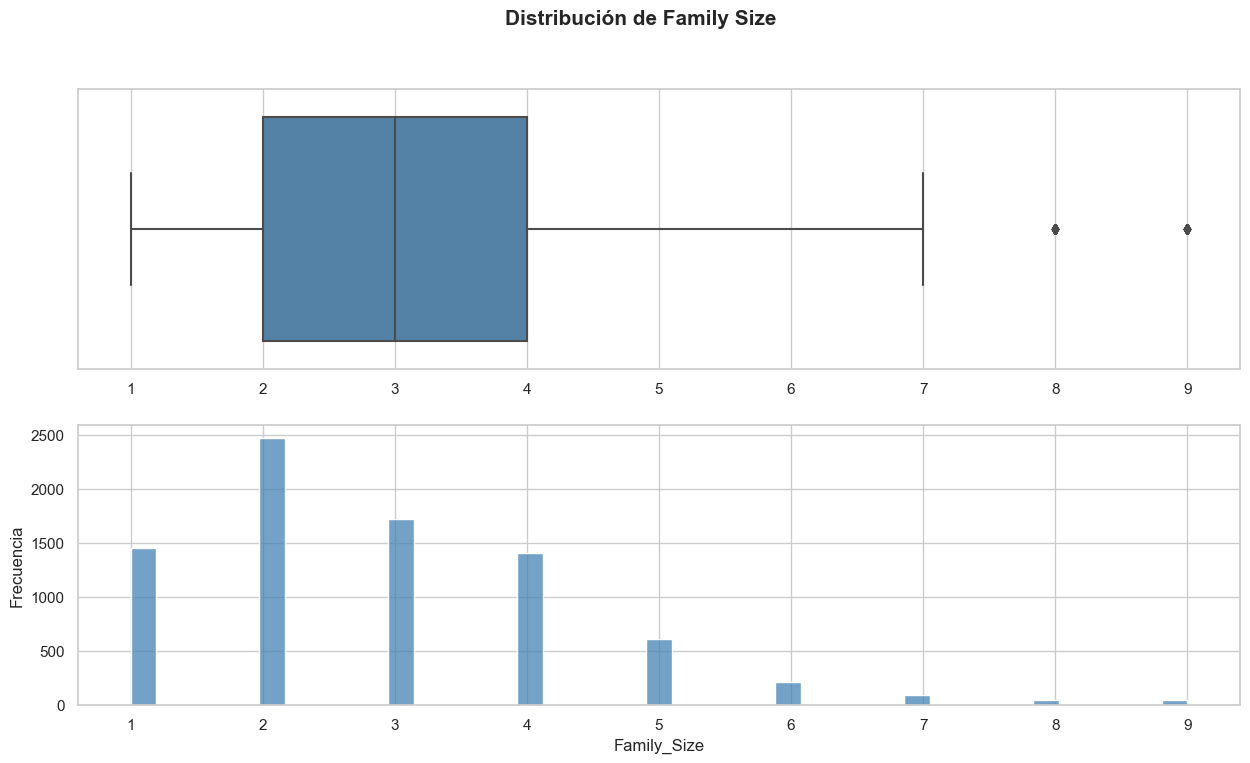

In [26]:
fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(15, 8))
fig.suptitle("Distribución de Family Size",fontsize=15, fontweight='bold')

plt.subplot(2,1,1)
ax=sns.boxplot(x=df_train_final['Family_Size'],color="steelblue")
plt.xlabel(" ")

plt.subplot(2,1,2)
ax=sns.histplot(x=df_train_final['Family_Size'],color="steelblue")
plt.ylabel("Frecuencia")

En el análisis de las distribuciones anteriores, se encuentra que, aunque se detecta que algunos datos superan el límite de posibles datos atípicos (Q3 + 1.5IQR), realmente, teniendo en cuenta el contexto del problema, no existen argumentos suficientes para indicar que estos valores sean valores atípicos como tal. En ese sentido, no se considera conveniente la limpieza de atípicos en alguna de las tres variables cuantitativas del dataset (Age, Work_Experiencia y Family_Size).

## 1.3. Exploratory Data Analysis (EDA)

In [27]:
tabla_freq=(pd.crosstab(index=df_train_final["Segmentation"],columns="count")).reset_index()
tabla_freq['Freq. Rel.']=tabla_freq['count']/sum(tabla_freq['count'])
tabla_freq.rename(columns={'count':'Freq. Abs.'},inplace=True)
tabla_freq=tabla_freq.sort_values(by='Freq. Abs.',ascending=False).reset_index(drop=True)
tabla_freq

col_0,Segmentation,Freq. Abs.,Freq. Rel.
0,D,2268,0.281111
1,A,1972,0.244422
2,C,1970,0.244175
3,B,1858,0.230293


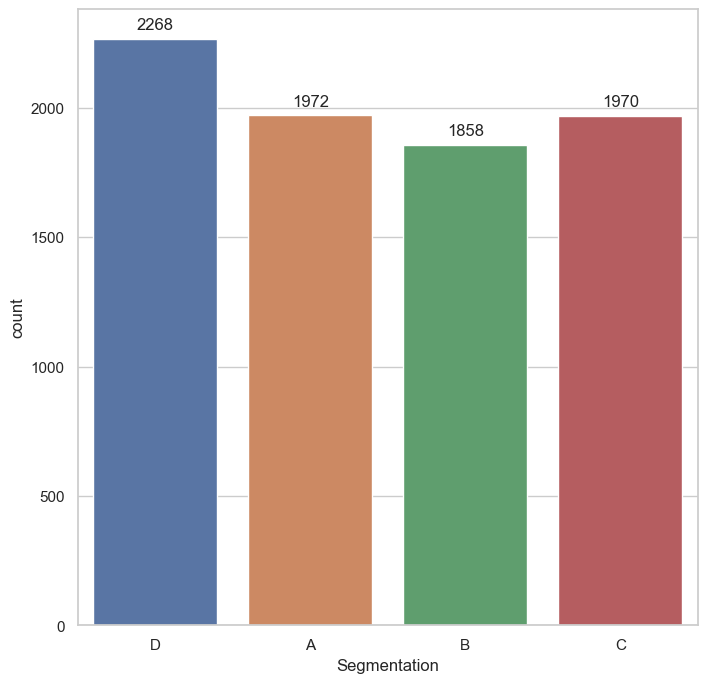

In [28]:
plt.figure(figsize=(8, 8))
ax = sns.countplot(x="Segmentation", data=df_train_final)
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.show()

Como se puede observar en el gráfico anterior la variable objetivo está desbalanceada. En este caso, hay mayor presencia de individuos en el segmento D, respecto de los otros segmentos. En este caso, es el segmento B el que tiene menor número de personas. Este desbalanceo supone una alerta en términos de evaluación de un modelo de clasificación. Lo anterior, pues si el segmento D es dominante, el modelo puede sesgarse hacia la predicción de ese segumento, y tener entonces dificultades para predecir correctamente los otros segmentos minoritarios. Lo anterior puede solucionarse apelando a ciertas métricas de evaluación que aminoran las consecuencias de este desbalanceo. También se puede hacer uso de algoritmos que tienen muy buena capacidad de predicción, aún ante este problema de desbalanceo.

### 1.3.1. Análisis bivariado (variable objetivos vs. resto de variables)

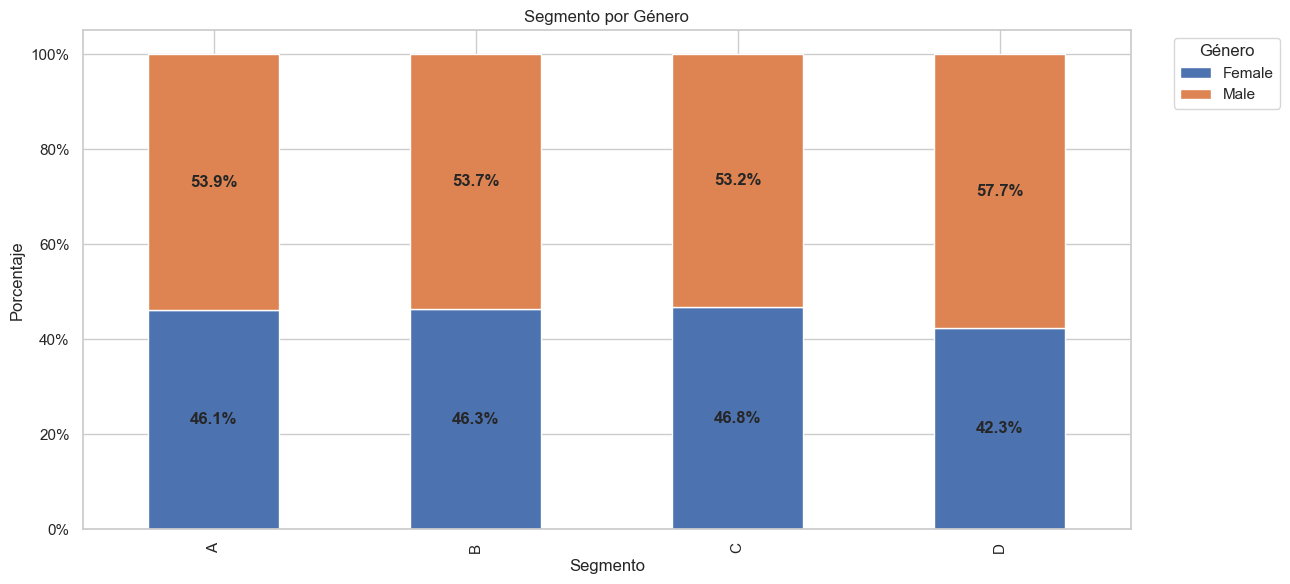

In [29]:
fig, ax1 = plt.subplots(figsize=(13, 6))
grouped1 = df_train_final.groupby(['Segmentation', 'Gender']).size().unstack()
grouped1 = grouped1.div(grouped1.sum(axis=1), axis=0)
ax1 = grouped1.plot(kind='bar', stacked=True, ax=ax1)
ax1.set_ylabel('Porcentaje')
ax1.set_xlabel('Segmento')
ax1.set_title('Segmento por Género')
for container in ax1.containers:
    ax1.bar_label(container, labels=[f'{val:.1%}' if val > 0 else '' for val in container.datavalues], 
                  label_type='center', fontweight='bold', fontsize=12)
legend1 = ax1.legend(loc='upper right', bbox_to_anchor=(1.15, 1))
legend1.set_title('Género')
ax1.yaxis.set_major_formatter(mtick.PercentFormatter(1.0, decimals=0))
plt.tight_layout()
plt.show()

Al analizar la relación entre la variable Segmentation y Gender, se encuentra que en todos los segmentos hay un menor número porcentaje de mujeres en comparación con los hombres. El segmento D, por su lado, es el que presenta un mayor porcentaje de hombres con un 58%. Por otro lado, el segmento C es el que presenta una menor proporción de hombres, y, por consiguiente, la mayor proporción de mujeres. Lo que quiere decir es que es más frecuente encontrar hombres en el segmento D, mientras que es más frecuente encontrar mujeres en el segmento C.

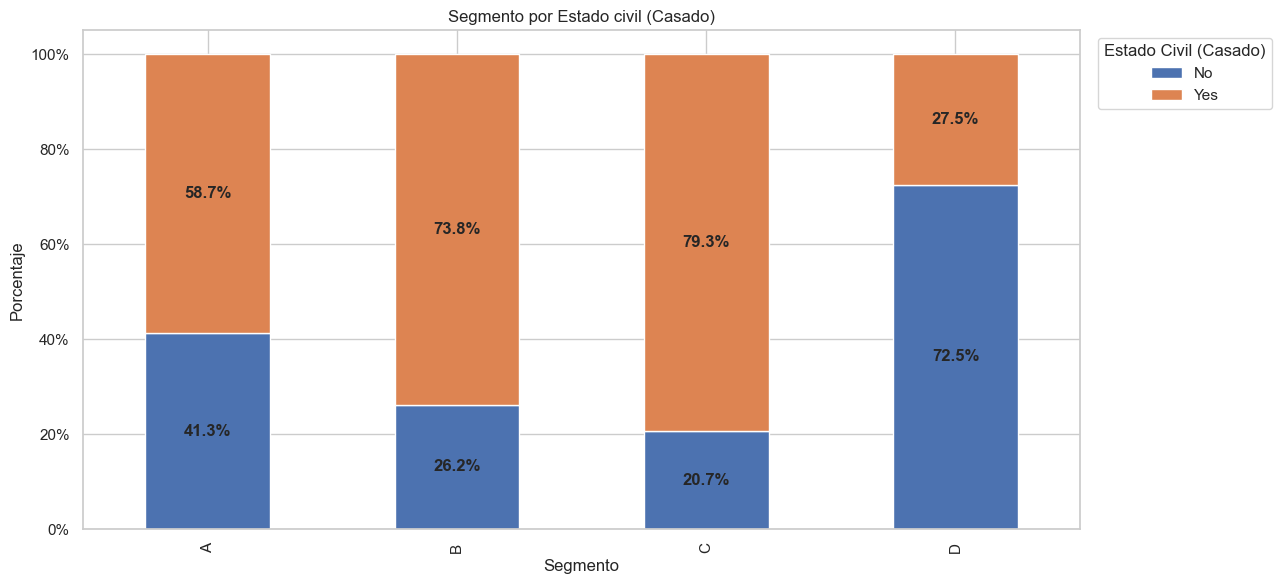

In [30]:
fig, ax1 = plt.subplots(figsize=(13, 6))
grouped1 = df_train_final.groupby(['Segmentation', 'Ever_Married']).size().unstack()
grouped1 = grouped1.div(grouped1.sum(axis=1), axis=0)
ax1 = grouped1.plot(kind='bar', stacked=True, ax=ax1)
ax1.set_ylabel('Porcentaje')
ax1.set_xlabel('Segmento')
ax1.set_title('Segmento por Estado civil (Casado)')
for container in ax1.containers:
    ax1.bar_label(container, labels=[f'{val:.1%}' if val > 0 else '' for val in container.datavalues], 
                  label_type='center', fontweight='bold', fontsize=12)
legend1 = ax1.legend(loc='upper right', bbox_to_anchor=(1.20, 1))
legend1.set_title('Estado Civil (Casado)')
ax1.yaxis.set_major_formatter(mtick.PercentFormatter(1.0, decimals=0))
plt.tight_layout()
plt.show()

Al analizar la relación entre la variable Segmentation y Ever_Married (estado civil), se encuentra que el segmento D es el que presenta una mayor proporción de personas que no se encuentran casadas. Por otro lado, el segmento C es el que presenta una menor proporción de personas que no se encuentran casadas. Esto sugiere que es más frecuente encontrar individuos que no están casados en el segmento D, mientras que es más frecuente encontrar individuos que sí están casados en el segmento C. 

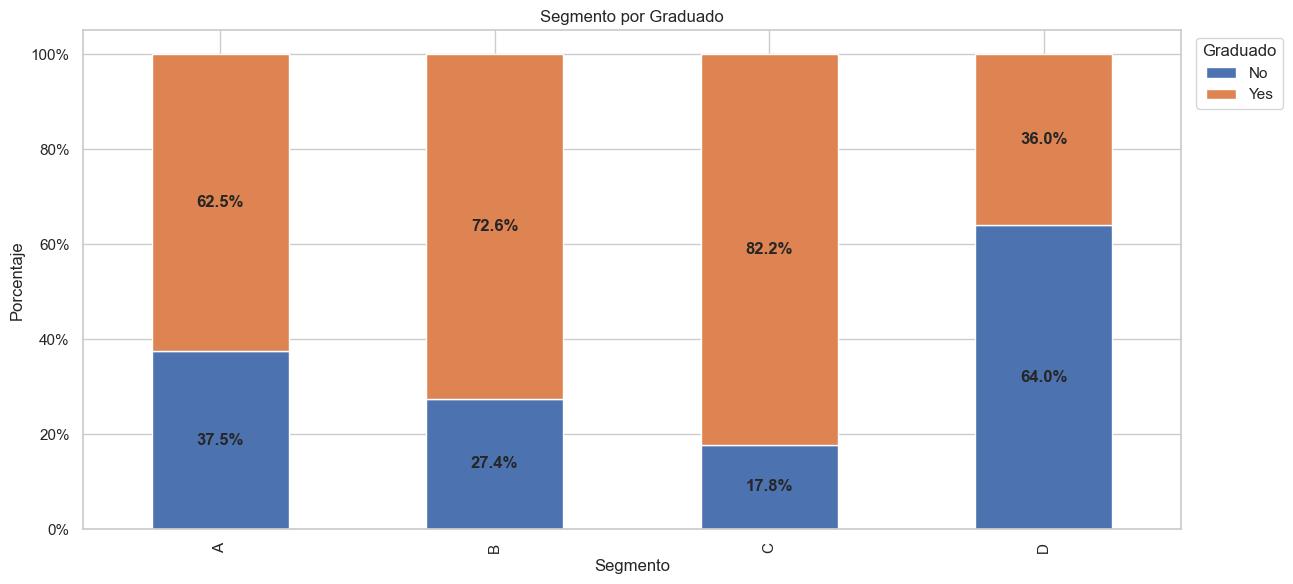

In [31]:
fig, ax1 = plt.subplots(figsize=(13, 6))
grouped1 = df_train_final.groupby(['Segmentation', 'Graduated']).size().unstack()
grouped1 = grouped1.div(grouped1.sum(axis=1), axis=0)
ax1 = grouped1.plot(kind='bar', stacked=True, ax=ax1)
ax1.set_ylabel('Porcentaje')
ax1.set_xlabel('Segmento')
ax1.set_title('Segmento por Graduado')
for container in ax1.containers:
    ax1.bar_label(container, labels=[f'{val:.1%}' if val > 0 else '' for val in container.datavalues], 
                  label_type='center', fontweight='bold', fontsize=12)
legend1 = ax1.legend(loc='upper right', bbox_to_anchor=(1.10, 1))
legend1.set_title('Graduado')
ax1.yaxis.set_major_formatter(mtick.PercentFormatter(1.0, decimals=0))
plt.tight_layout()
plt.show()

Al analizar la relación entre la variable Segmentation y Graduated, se encuentra que el segmento D es el que presenta una mayor proporción de personas que no se encuentran graduadas. Por otro lado, el segmento C es el que presenta una mayor proporción de personas que sí están graduadas. Esto sugiere que es más frecuente encontrar individuos que no están graduados en el segmento D, mientras que es más frecuente encontrar individuos que sí están graduados en el segmento C. 

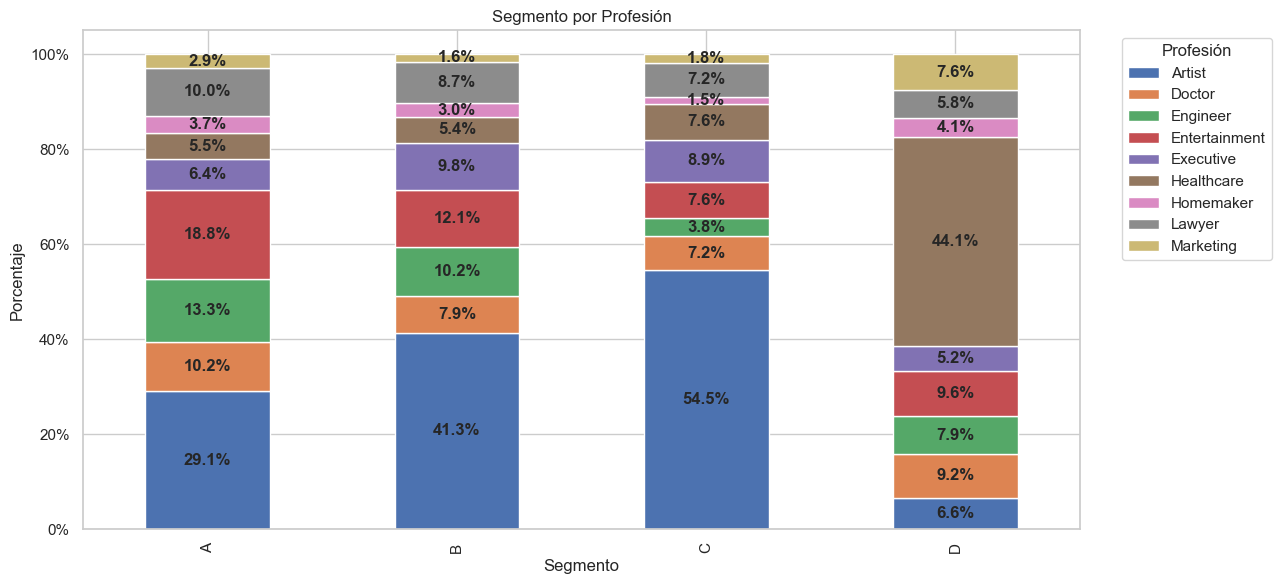

In [32]:
fig, ax1 = plt.subplots(figsize=(13, 6))
grouped1 = df_train_final.groupby(['Segmentation', 'Profession']).size().unstack()
grouped1 = grouped1.div(grouped1.sum(axis=1), axis=0)
ax1 = grouped1.plot(kind='bar', stacked=True, ax=ax1)
ax1.set_ylabel('Porcentaje')
ax1.set_xlabel('Segmento')
ax1.set_title('Segmento por Profesión')
for container in ax1.containers:
    ax1.bar_label(container, labels=[f'{val:.1%}' if val > 0 else '' for val in container.datavalues], 
                  label_type='center', fontweight='bold', fontsize=12)
legend1 = ax1.legend(loc='upper right', bbox_to_anchor=(1.20, 1))
legend1.set_title('Profesión')
ax1.yaxis.set_major_formatter(mtick.PercentFormatter(1.0, decimals=0))
plt.tight_layout()
plt.show()

Al analizar la relación entre la variable Segmentation y Graduated, se encuentra que el segmento C es el que presenta una mayor proporción de artistas (profesión mayoritaria). El segmento A es el que presenta una mayor proporción de doctores, ingenieros, abogados y personas encargadas del entretenimiento. El segmento B es el que presenta una mayor proporción de ejecutivos. Por último, el segmento D es el que presenta una mayor proporción de clientes dedicados a la salud y mercadeo. Lo anterior quiere decir que:

- Es más frecuente encontrar clientes doctores, ingenieros, abogados y personas encargadas del entretenimiento, en el segmento A.
- Es más frecuente encontrar clientes ejecutivos en el segmento B.
- Es más frecuente encontrar clientes artistas en el segmento C.
- Es más frecuente encontrar clientes dedicados a la salud y al mercadeo en el segmento D.

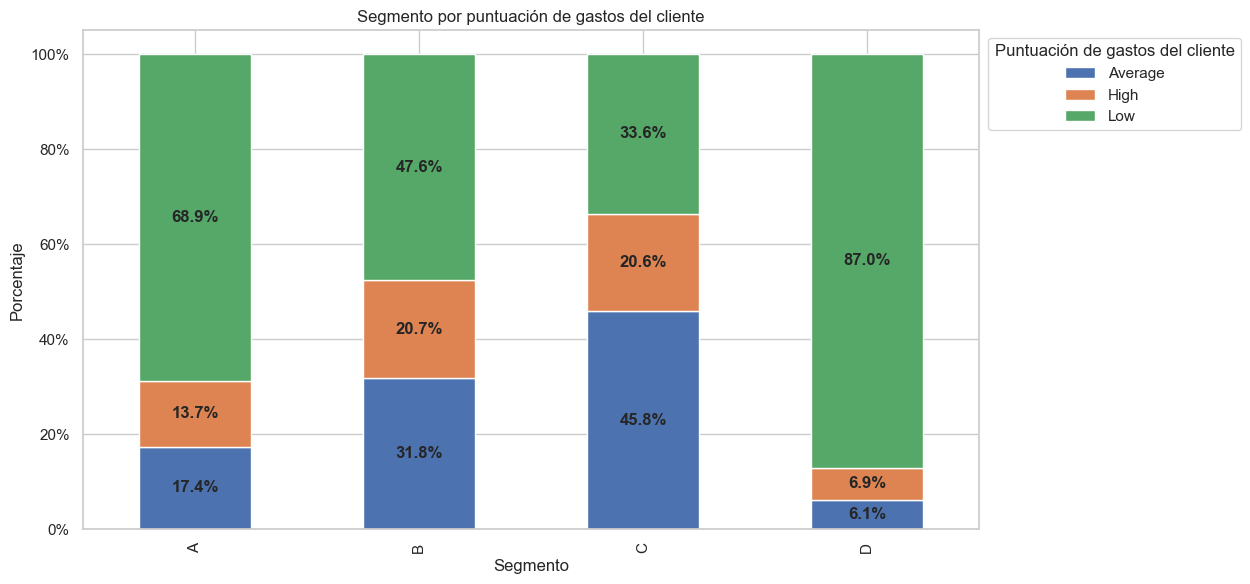

In [33]:
fig, ax1 = plt.subplots(figsize=(13, 6))
grouped1 = df_train_final.groupby(['Segmentation', 'Spending_Score']).size().unstack()
grouped1 = grouped1.div(grouped1.sum(axis=1), axis=0)
ax1 = grouped1.plot(kind='bar', stacked=True, ax=ax1)
ax1.set_ylabel('Porcentaje')
ax1.set_xlabel('Segmento')
ax1.set_title('Segmento por puntuación de gastos del cliente')
for container in ax1.containers:
    ax1.bar_label(container, labels=[f'{val:.1%}' if val > 0 else '' for val in container.datavalues], 
                  label_type='center', fontweight='bold', fontsize=12)
legend1 = ax1.legend(loc='upper right', bbox_to_anchor=(1.3, 1))
legend1.set_title('Puntuación de gastos del cliente')
ax1.yaxis.set_major_formatter(mtick.PercentFormatter(1.0, decimals=0))
plt.tight_layout()
plt.show()

Al analizar la relación entre la variable Segmentation y Spending_Score, se encuentra que el segmento D es el que presenta una mayor proporción de clientes con puntuaciones de gastos en nivel bajo. Por otro lado, el segmento B es el que presenta una mayor proporción de clientes con puntuaciones de gastos en nivel alto. Por último, el segmento C es el que presenta una mayor proporción de personas con puntuaciones de gastos promedio. Esto sugiere que:

- Es más frecuente encontrar clientes con puntuaciones de ingreso altas en el segmento B.
- Es más frecuente encontrar clientes con puntuaciones de ingreso promedio en el segmento C.
- Es más frecuente encontrar clientes con puntuaciones de ingreso bajas en el segmento D.

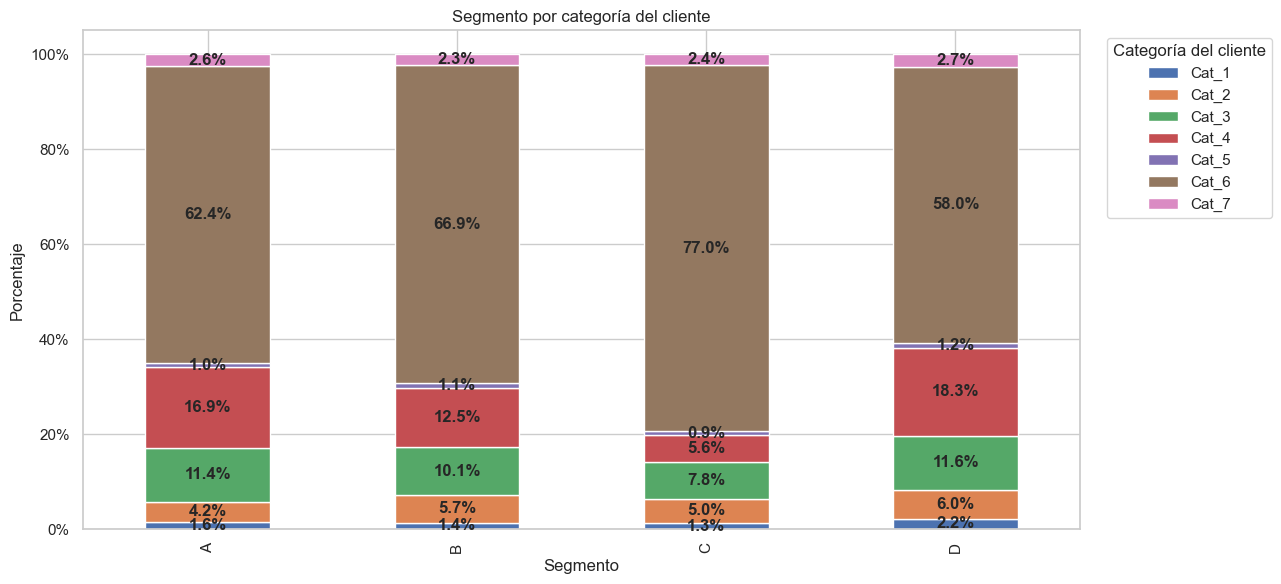

In [34]:
fig, ax1 = plt.subplots(figsize=(13, 6))
grouped1 = df_train_final.groupby(['Segmentation', 'Var_1']).size().unstack()
grouped1 = grouped1.div(grouped1.sum(axis=1), axis=0)
ax1 = grouped1.plot(kind='bar', stacked=True, ax=ax1)
ax1.set_ylabel('Porcentaje')
ax1.set_xlabel('Segmento')
ax1.set_title('Segmento por categoría del cliente')
for container in ax1.containers:
    ax1.bar_label(container, labels=[f'{val:.1%}' if val > 0 else '' for val in container.datavalues], 
                  label_type='center', fontweight='bold', fontsize=12)
legend1 = ax1.legend(loc='upper right', bbox_to_anchor=(1.2, 1))
legend1.set_title('Categoría del cliente')
ax1.yaxis.set_major_formatter(mtick.PercentFormatter(1.0, decimals=0))
plt.tight_layout()
plt.show()

Al analizar la relación entre la variable Segmentation y Var_1, se encuentra que el segmento C es el que presenta mayor proporción de clientes con categoría 6 (clase mayoritaria). Por otro lado, se encuentra que el segmento D es el que presenta mayor proporción de clientes con categorías 1,2,3,4,5 y 7. Esto sugiere que:

- Es más frecuente encontrar clientes con categoría 6 en el segmento C.
- Es más frecuente encontrar clientes con categorías 1, 2, 3, 4, 5 y 7 en el segmento D.

C:\Windows\Temp\ipykernel_25576\3298058664.py:13: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_train_final[df_train_final['Segmentation'] == 'A']['Age'], shade=True, color='blue')
C:\Windows\Temp\ipykernel_25576\3298058664.py:14: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_train_final[df_train_final['Segmentation'] == 'B']['Age'], shade=True, color='orange')
C:\Windows\Temp\ipykernel_25576\3298058664.py:15: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_train_final[df_train_final['Segmentation'] == 'C']['Age'], shade=True, color='green')
C:\Windows\Temp\ipykernel_25576\3298058664.py:16: FutureWarning: 

`shade

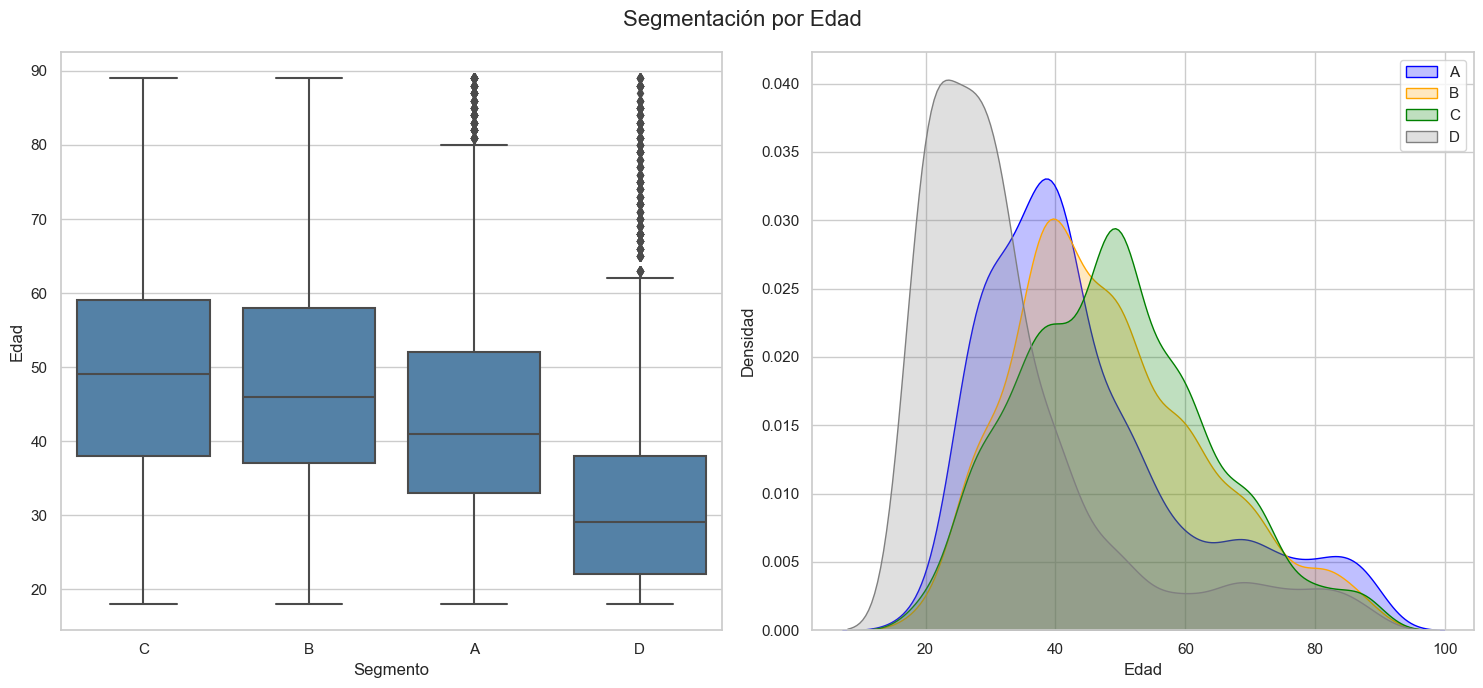

In [35]:
plt.figure(figsize=(15, 7))
plt.suptitle("Segmentación por Edad", fontsize=16)

plt.subplot(1, 2, 1)
tabla_cont = df_train_final.groupby(by=["Segmentation"])["Age"].describe().sort_values(by='50%', ascending=False)
tabla_cont
ax = sns.boxplot(x=df_train_final['Segmentation'], y=df_train_final['Age'], color="steelblue",
                 order=tabla_cont.sort_values(by='50%', ascending=False).index)
plt.xlabel("Segmento")
plt.ylabel("Edad")

plt.subplot(1, 2, 2)
sns.kdeplot(df_train_final[df_train_final['Segmentation'] == 'A']['Age'], shade=True, color='blue')
sns.kdeplot(df_train_final[df_train_final['Segmentation'] == 'B']['Age'], shade=True, color='orange')
sns.kdeplot(df_train_final[df_train_final['Segmentation'] == 'C']['Age'], shade=True, color='green')
sns.kdeplot(df_train_final[df_train_final['Segmentation'] == 'D']['Age'], shade=True, color='grey')
plt.legend(['A', 'B', 'C', 'D'])
plt.xlabel("Edad")
plt.ylabel("Densidad")

plt.tight_layout()
plt.show()

In [36]:
tabla_cont=df_train_final.groupby(by=["Segmentation"])["Age"].describe().sort_values(by='50%', ascending=False)
tabla_cont

,count,mean,std,min,25%,50%,75%,max
Segmentation,,,,,,,,
C,1970.0,49.144162,14.575090,18.0,38.0,49.0,59.0,89.0
B,1858.0,48.200215,14.806443,18.0,37.0,46.0,58.0,89.0
A,1972.0,44.924949,16.406909,18.0,33.0,41.0,52.0,89.0
D,2268.0,33.390212,15.680304,18.0,22.0,29.0,38.0,89.0


Al analizar la relación entre las variables Segmentation y Age, se encuentra un comportamiento relativamente claro y es que el segmento C es quien presenta los clientes con mayor edad puesto que la mediana de edad asociada a este segmento es mayor en comparación a la de los otros segmentos, adicionalmente, los valores de los cuartiles son también mayores en este segmento frente a otros segmentos. Por otro lado, se encuentra que el segmento D es el que presenta un mayor número de clientes con menor edad. Lo anterior quiere decir que es más frecuente encontrar clientes con baja edad en el segmento D, mientras que es más frecuente encontrar clientes de edad mayor en el segmento C.

C:\Windows\Temp\ipykernel_25576\842377033.py:13: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_train_final[df_train_final['Segmentation'] == 'A']['Work_Experience'], shade=True, color='blue')
C:\Windows\Temp\ipykernel_25576\842377033.py:14: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_train_final[df_train_final['Segmentation'] == 'B']['Work_Experience'], shade=True, color='orange')
C:\Windows\Temp\ipykernel_25576\842377033.py:15: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_train_final[df_train_final['Segmentation'] == 'C']['Work_Experience'], shade=True, color='green')
C:\Windows\Temp\ipykernel_25576\84237703

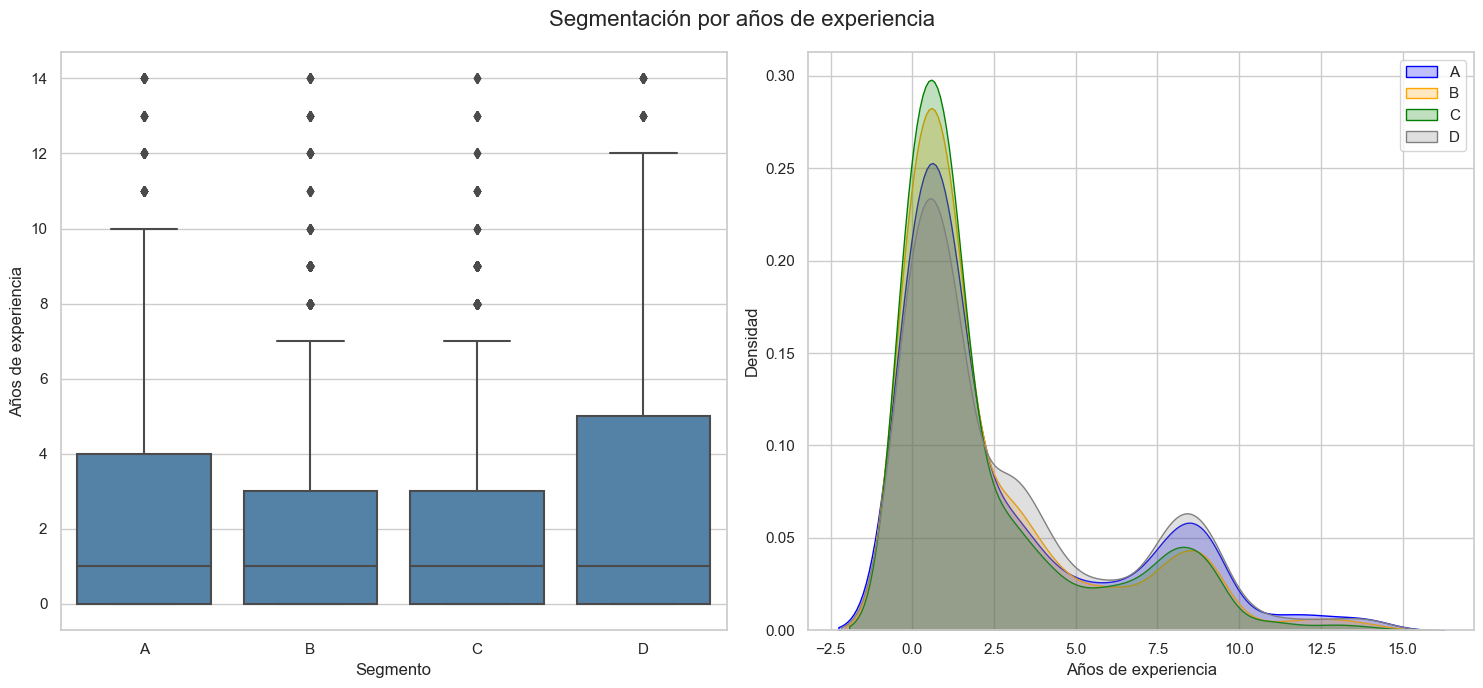

In [37]:
plt.figure(figsize=(15, 7))
plt.suptitle("Segmentación por años de experiencia", fontsize=16)

plt.subplot(1, 2, 1)
tabla_cont = df_train_final.groupby(by=["Segmentation"])["Work_Experience"].describe().sort_values(by='50%', ascending=False)
tabla_cont
ax = sns.boxplot(x=df_train_final['Segmentation'], y=df_train_final['Work_Experience'], color="steelblue",
                 order=tabla_cont.sort_values(by='50%', ascending=False).index)
plt.xlabel("Segmento")
plt.ylabel("Años de experiencia")

plt.subplot(1, 2, 2)
sns.kdeplot(df_train_final[df_train_final['Segmentation'] == 'A']['Work_Experience'], shade=True, color='blue')
sns.kdeplot(df_train_final[df_train_final['Segmentation'] == 'B']['Work_Experience'], shade=True, color='orange')
sns.kdeplot(df_train_final[df_train_final['Segmentation'] == 'C']['Work_Experience'], shade=True, color='green')
sns.kdeplot(df_train_final[df_train_final['Segmentation'] == 'D']['Work_Experience'], shade=True, color='grey')
plt.legend(['A', 'B', 'C', 'D'])
plt.xlabel("Años de experiencia")
plt.ylabel("Densidad")

plt.tight_layout()
plt.show()

In [38]:
tabla_cont=df_train_final.groupby(by=["Segmentation"])["Work_Experience"].describe().sort_values(by='50%', ascending=False)
tabla_cont

,count,mean,std,min,25%,50%,75%,max
Segmentation,,,,,,,,
A,1972.0,2.842799,3.434187,0.0,0.0,1.0,4.0,14.0
B,1858.0,2.386437,3.066007,0.0,0.0,1.0,3.0,14.0
C,1970.0,2.250254,2.931383,0.0,0.0,1.0,3.0,14.0
D,2268.0,3.006614,3.399246,0.0,0.0,1.0,5.0,14.0


A simple vista, al analizar la relación entre segmentation y work_experience no se encuentra que un segmento tenga clientes mayoritariamente con más o menos años de experiencia en relación con otros segmentos. La mediana de años de experiencia de los clientes en todos los segmentos es exactamente igual: 1. Por otro lado, el valor máximo de años de experiencia en todos los segmentos es igual a 14. Sin embargo, existe un fenómeno sobre el que hacer hincapé y es que, aunque todos los segmentos tienen el mismo valor en el primer cuartil y el segundo cuartil, no sucede así con el tercero (75%) en el que los segmentos B y C tienen el mismo valor (3), pero los segumentos A y D tienen valores más altos, 4 y 5, respectivamente. En el caso de las distribuciones de los años de experiencia para los segmentos A y D, éstas presentan asimetrías hacia la derecha más pronunciadas que en el caso de los segmentos B y C. Estas asimetrías se dan por la presencia de un mayor número de clientes (pocos realmente) con más años de experiencia en los segmentos A y D, en comparación con los otros dos segmentos. Entonces, si bien estos pocos clientes con altos años de experiencia no terminan por afectar los valores de la mediana (porque son pocos), sí es preciso decir que los segmentos B y C tienen una mayor densidad de clientes con años de experiencia entre 6 y 12.5 aproximadamente, en comparación con los otros dos segmentos. Esto se puede apreciar en el gráfico de densidades.

C:\Windows\Temp\ipykernel_25576\2408532207.py:13: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_train_final[df_train_final['Segmentation'] == 'A']['Family_Size'], shade=True, color='blue')
C:\Windows\Temp\ipykernel_25576\2408532207.py:14: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_train_final[df_train_final['Segmentation'] == 'B']['Family_Size'], shade=True, color='orange')
C:\Windows\Temp\ipykernel_25576\2408532207.py:15: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_train_final[df_train_final['Segmentation'] == 'C']['Family_Size'], shade=True, color='green')
C:\Windows\Temp\ipykernel_25576\2408532207.py:16:

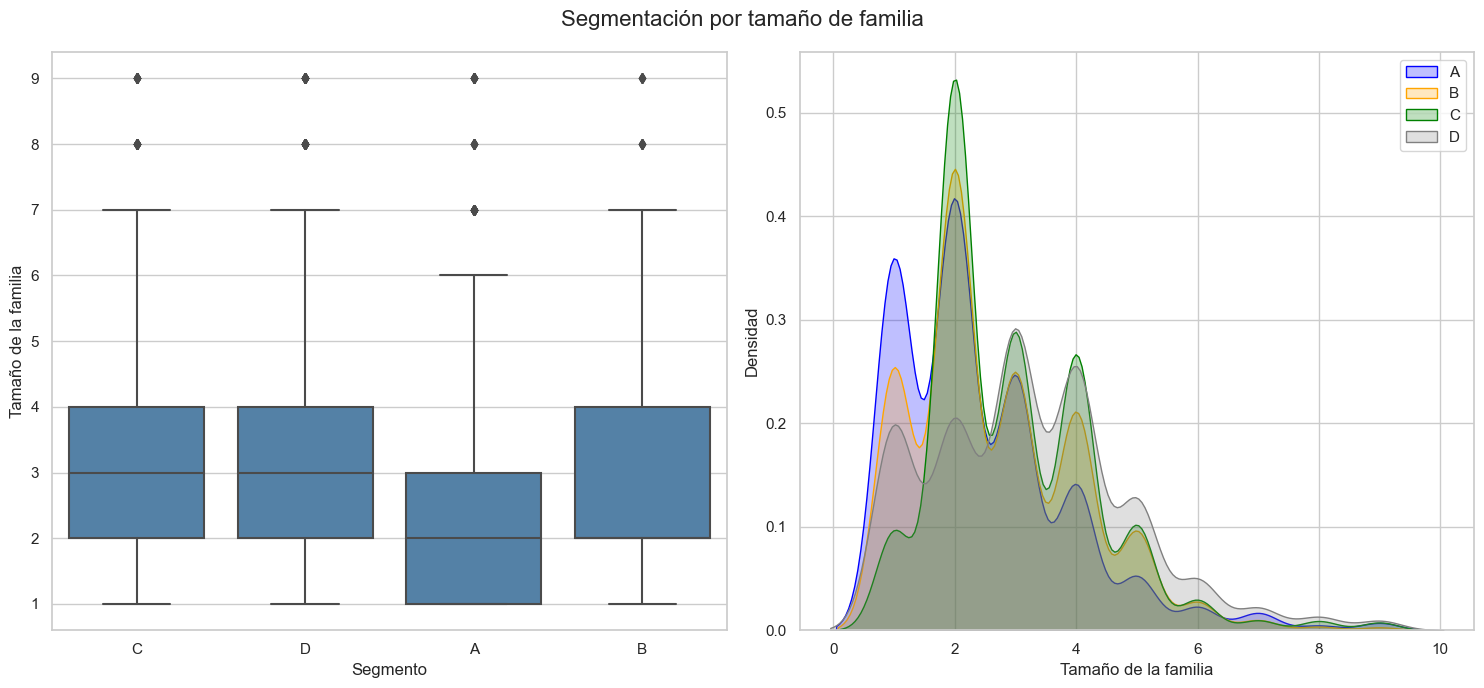

In [39]:
plt.figure(figsize=(15, 7))
plt.suptitle("Segmentación por tamaño de familia", fontsize=16)

plt.subplot(1, 2, 1)
tabla_cont = df_train_final.groupby(by=["Segmentation"])["Family_Size"].describe().sort_values(by='50%', ascending=False)
tabla_cont
ax = sns.boxplot(x=df_train_final['Segmentation'], y=df_train_final['Family_Size'], color="steelblue",
                 order=tabla_cont.sort_values(by='50%', ascending=False).index)
plt.xlabel("Segmento")
plt.ylabel("Tamaño de la familia")

plt.subplot(1, 2, 2)
sns.kdeplot(df_train_final[df_train_final['Segmentation'] == 'A']['Family_Size'], shade=True, color='blue')
sns.kdeplot(df_train_final[df_train_final['Segmentation'] == 'B']['Family_Size'], shade=True, color='orange')
sns.kdeplot(df_train_final[df_train_final['Segmentation'] == 'C']['Family_Size'], shade=True, color='green')
sns.kdeplot(df_train_final[df_train_final['Segmentation'] == 'D']['Family_Size'], shade=True, color='grey')
plt.legend(['A', 'B', 'C', 'D'])
plt.xlabel("Tamaño de la familia")
plt.ylabel("Densidad")

plt.tight_layout()
plt.show()

In [40]:
tabla_cont=df_train_final.groupby(by=["Segmentation"])["Family_Size"].describe().sort_values(by='50%', ascending=False)
tabla_cont

,count,mean,std,min,25%,50%,75%,max
Segmentation,,,,,,,,
C,1970.0,2.969543,1.364159,1.0,2.0,3.0,4.0,9.0
D,2268.0,3.220459,1.642210,1.0,2.0,3.0,4.0,9.0
A,1972.0,2.451826,1.450419,1.0,1.0,2.0,3.0,9.0
B,1858.0,2.694833,1.394653,1.0,2.0,2.0,4.0,9.0


Al analizar la relación entre las variables Segmentation y Family_Size se encuentra que los dos segmentos en los que hay mayor número de clientes con familias de mayor tamaño son los segmentos C y D, que alcanzan una mediana de 3 integrantes por familia. En el caso de los segmentos A y B, esta métrica es igual a 2. En este caso, parece ocurrir que es más frecuente encontrar clientes con tamaños de familia altos en el segmento D (aunque ambos tienen el mismo valor de mediana, la media de tamaño de familia del segmento D es mayor). De forma análoga, parece ocurrir que es más frecuente encontrar clientes con tamaños de familia bajos en el segmento A (aunque ambos tienen el mismo valor de mediana, la media de tamaño de familia del segmento A es menor).

In [41]:
df_train_final.to_excel('df_train_final.xlsx')

# **Punto 2: Modelos Predictivos**

## 2.1. Pre-procesamiento y Pipelines

In [42]:
# Datasets finales
df_train = pd.read_csv('Train.csv')
df_test = pd.read_csv('Test.csv')

df_full = pd.concat([df_train,df_test], axis = 0)



label_encoders = {}

columns_to_encode = ['Gender', 'Ever_Married', 'Graduated', 'Profession', 'Spending_Score', 'Var_1','Segmentation']
# Iterar sobre las columnas y aplicar la transformación
for column in columns_to_encode:
    le = LabelEncoder()
    df_full[column] = le.fit_transform(df_full[column])
    label_encoders[column] = le
le=LabelEncoder()

df_train = df_full[:8068]
df_test = df_full[-2627:]

X_train = df_train.loc[:,['Gender', 'Ever_Married', 'Graduated', 'Profession', 'Spending_Score',
       'Var_1', 'Age', 'Work_Experience', 'Family_Size']]
y_train = df_train.loc[:,['Segmentation']]
X_test = df_test.loc[:,['Gender', 'Ever_Married', 'Graduated', 'Profession', 'Spending_Score',
       'Var_1', 'Age', 'Work_Experience', 'Family_Size']]
y_test = df_test.loc[:,['Segmentation']]

In [43]:

#del(df_train['Unnamed: 0'])
df_train.set_index('ID', drop= True, inplace=True)
df_train.head()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
ID,,,,,,,,,,
462809,1,0,22,0,5,1.0,2,4.0,3,3
462643,0,1,38,1,2,NaN,0,3.0,3,0
466315,0,1,67,1,2,1.0,2,1.0,5,1
461735,1,1,67,1,7,0.0,1,2.0,5,1
462669,0,1,40,1,3,NaN,1,6.0,5,0


In [44]:
df_test.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,458989,0,1,36,1,2,0.0,2,1.0,5,1
1,458994,1,1,37,1,5,8.0,0,4.0,5,0
2,458996,0,1,69,0,9,0.0,2,1.0,5,0
3,459000,1,1,59,0,4,11.0,1,2.0,5,1
4,459001,0,0,19,0,8,NaN,2,4.0,5,0


In [45]:
# Función de métricas
def get_metrics(y_test, y_pred):
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred,average='macro')
    recall = recall_score(y_test, y_pred,average='macro')
    f1 = f1_score(y_test, y_pred,average='macro')
    conf_matrix = confusion_matrix(y_test, y_pred)
    classification_rep = classification_report(y_test, y_pred)
    kappa = cohen_kappa_score(y_test, y_pred)
    #baseline=y_true.value_counts(True)
    
    return dict(
        #roc_auc=roc_auc,
        accuracy=accuracy,
        precision=precision,
        recall=recall,
        f1=f1,
        kappa = kappa
        #baseline=baseline.iloc[0]
    )

In [46]:
# Configuraciones generales
categoricas = X_train.select_dtypes('object').columns
numericas = X_train.select_dtypes('number').columns

config_onehot = dict(
    handle_unknown='ignore'
)

In [47]:
# Modelos 
RL_Model = LogisticRegression() # Regresión logística
KNN_Model = KNeighborsClassifier() # KNN
XG_Model = XGBClassifier() # XGBoost
NV_Model = GaussianNB() #Naive bayes

In [48]:
# Pipelines transformadores
#IterativeImputer(random_state=45, max_iter=20)
KNN_Clasificador=KNeighborsClassifier(n_neighbors=5)
#imputer_cuali = IterativeImputer(random_state=45, max_iter=20, estimator=KNN_Clasificador)
numeric_transformer = Pipeline(
    steps=[("scaler", StandardScaler()),
            ("imputer",  IterativeImputer(random_state=45, max_iter=10))
          ]
)

categorical_transformer = Pipeline(
    steps=[
        ('imputer', IterativeImputer(random_state=45, max_iter=20, estimator=KNN_Clasificador))]
)

preprocessor = ColumnTransformer(
    transformers=[
        ("Numericas", numeric_transformer, numericas),
        ("Categoricas", categorical_transformer, categoricas)
    ]
)

config_xgb = dict(
    use_label_encoder=False, eval_metric='logloss'
)


In [49]:
preprocessor

ColumnTransformer(transformers=[('Numericas',
                                 Pipeline(steps=[('scaler', StandardScaler()),
                                                 ('imputer',
                                                  IterativeImputer(random_state=45))]),
                                 Index(['Gender', 'Ever_Married', 'Graduated', 'Profession', 'Spending_Score',
       'Var_1', 'Age', 'Work_Experience', 'Family_Size'],
      dtype='object')),
                                ('Categoricas',
                                 Pipeline(steps=[('imputer',
                                                  IterativeImputer(estimator=KNeighborsClassifier(),
                                                                   max_iter=20,
                                                                   random_state=45))]),
                                 Index([], dtype='object'))])

In [50]:
# Pipelines de modelos

RL_pipeline = Pipeline([
    ('Preprocesamiento', preprocessor),
    ('Clasificador', RL_Model)
])
KNN_pipeline = Pipeline([
    ('Preprocesamiento', preprocessor),
    ('Clasificador', KNN_Model)
])
NV_pipeline = Pipeline([
    ('Preprocesamiento', preprocessor),
    ('Clasificador', NV_Model)
])


XG_pipeline = Pipeline([
    ('Preprocesamiento', preprocessor),
    ('Clasificador', XGBClassifier(**config_xgb))
])

C:\Users\Victus\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


In [51]:
# Pipeline XGBoost
XG_pipeline

Pipeline(steps=[('Preprocesamiento',
                 ColumnTransformer(transformers=[('Numericas',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler()),
                                                                  ('imputer',
                                                                   IterativeImputer(random_state=45))]),
                                                  Index(['Gender', 'Ever_Married', 'Graduated', 'Profession', 'Spending_Score',
       'Var_1', 'Age', 'Work_Experience', 'Family_Size'],
      dtype='object')),
                                                 ('Categoricas',
                                                  Pipeline(steps=[('imputer...
                               feature_types=None, gamma=None, gpu_id=None,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=100,
                               n_jobs=None, num_parallel_tree=None,
                               predictor=None, random_state=None, ...))])

## 2.2. Baseline y entrenamiento de modelos

In [52]:
dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X_train, y_train)
y_pred_baseline = dummy_clf.predict(X_test)
baseline_accuracy = accuracy_score(y_test, y_pred_baseline)
print(f'Baseline Accuracy: {baseline_accuracy:.4f}')

Baseline Accuracy: 0.2889


**Planteamiento inicial:**

Se parte de un baseline de 0.2889. Nuestro objetivo es mejorar, a partir de los siguientes modelos la capacidad de predecir el segmento en el que se clasifica un cliente dada sus caracteristicas.

In [53]:
# Entrenamiento de modelos
RL_pipeline.fit(X_train,y_train)
KNN_pipeline.fit(X_train,y_train)
NV_pipeline.fit(X_train,y_train)
XG_pipeline.fit(X_train,y_train)

print("Modelos entrenados")

C:\Users\Victus\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Victus\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Victus\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Modelos entrenados


## 2.3. Evaluación de resultados

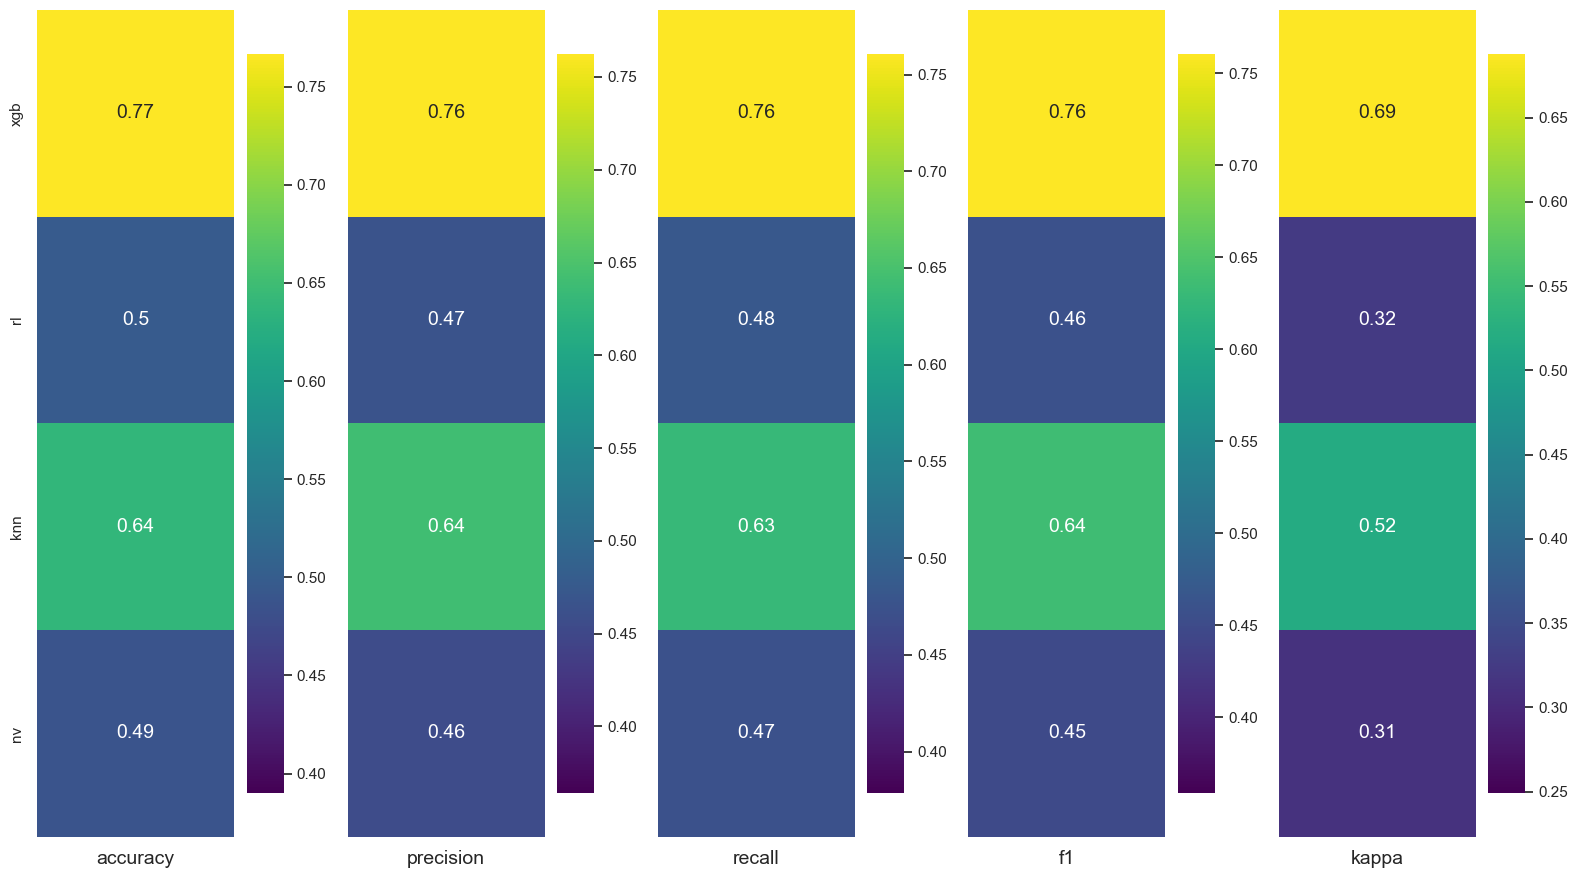

In [54]:
# Realizar predicciones en el conjunto de prueba
y_pred_rl = RL_pipeline.predict(X_train)
y_pred_knn = KNN_pipeline.predict(X_train)
y_pred_nv = NV_pipeline.predict(X_train)
y_pred_xgb = XG_pipeline.predict(X_train)


rl_metrics = get_metrics(y_train, y_pred_rl)
knn_metrics = get_metrics(y_train, y_pred_knn)
nv_metrics = get_metrics(y_train, y_pred_nv)
xgb_metrics = get_metrics(y_train, y_pred_xgb)

# Diccionario de métricas
metrics_train = dict(
    xgb=xgb_metrics,
    rl=rl_metrics,
    knn=knn_metrics,
    nv=nv_metrics
)

df_metrics_train = pd.DataFrame.from_dict(metrics_train, orient='index')
plt.rc('font', size=14)
plt.rc('xtick', labelsize=14)

fig, axs = plt.subplots(1, 5, figsize=(16, 9), sharey=True)

for i, ax in enumerate(axs):
    sns.heatmap(
        df_metrics_train.iloc[:, [i]],
        ax=ax,
        vmin=df_metrics_train.iloc[:, [i]].min()*0.8,
        vmax=df_metrics_train.iloc[:, [i]].max(),
        annot=True,
        cmap='viridis'
    )
    
fig.tight_layout()

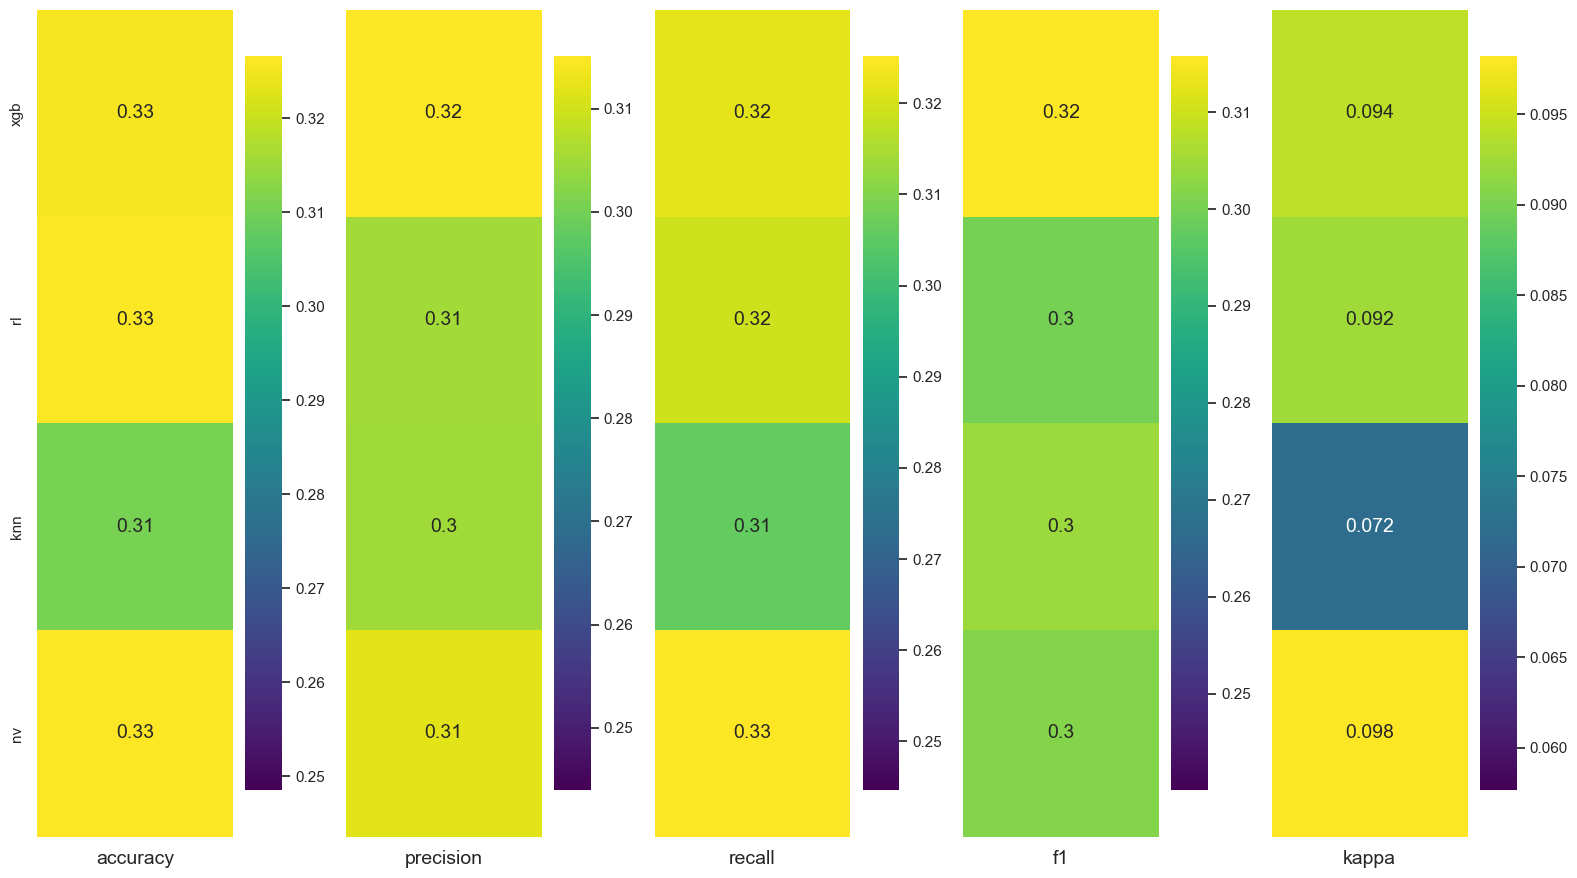

In [55]:
# Realizar predicciones en el conjunto de prueba
y_pred_rl = RL_pipeline.predict(X_test)
y_pred_knn = KNN_pipeline.predict(X_test)
y_pred_nv = NV_pipeline.predict(X_test)
y_pred_xgb = XG_pipeline.predict(X_test)


rl_metrics = get_metrics(y_test, y_pred_rl)
knn_metrics = get_metrics(y_test, y_pred_knn)
nv_metrics = get_metrics(y_test, y_pred_nv)
xgb_metrics = get_metrics(y_test, y_pred_xgb)

# Diccionario de métricas
metrics_test = dict(
    xgb=xgb_metrics,
    rl=rl_metrics,
    knn=knn_metrics,
    nv=nv_metrics
)

df_metrics_test = pd.DataFrame.from_dict(metrics_test, orient='index')
plt.rc('font', size=14)
plt.rc('xtick', labelsize=14)

fig, axs = plt.subplots(1, 5, figsize=(16, 9), sharey=True)

for i, ax in enumerate(axs):
    sns.heatmap(
        df_metrics_test.iloc[:, [i]],
        ax=ax,
        vmin=df_metrics_test.iloc[:, [i]].min()*0.8,
        vmax=df_metrics_test.iloc[:, [i]].max(),
        annot=True,
        cmap='viridis'
    )
    
fig.tight_layout()

**Planteamiento intermedio:**

Con la implementaciónd de 4 modelos de clasificación: Naive Bayes, KNeighborsClassifier, LogisticRegression y XGBoostClassifier

Se logra un mejora promedio del accuraccy en **0.032**. Siendo el modelo de regresión logistica, el que obtiene el mejor desempeño (Accuracy: 0.33, kappa: 0.096).

## 2.4. Protocolos de evaluación y formación

In [56]:
from sklearn.model_selection import cross_val_score, StratifiedKFold, GridSearchCV

num_folds = 10

cv_strategy = StratifiedKFold(n_splits=num_folds)

models = [RL_pipeline, KNN_pipeline, NV_pipeline, XG_pipeline]

cv_accuracy_val = {}
for index, model in enumerate(models):
    cv_scores = cross_val_score(model, X_train, y_train, cv=cv_strategy, scoring='accuracy')
    cv_accuracy_val[model.named_steps['Clasificador'].__class__.__name__] = np.mean(cv_scores)


C:\Users\Victus\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Victus\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Victus\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Victus\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samp

In [57]:
num_folds = 10
cv_strategy = StratifiedKFold(n_splits=num_folds)
cv_kappa_val = {}
for index, model in enumerate(models):
    def kappa_score (model, X, y):
        y_pred = model.predict(X)
        return cohen_kappa_score(y, y_pred)

    cv_scores = cross_val_score(model, X_train, y_train, cv=cv_strategy, scoring=kappa_score)
    cv_kappa_val[model.named_steps['Clasificador'].__class__.__name__] = np.mean(cv_scores)


C:\Users\Victus\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Victus\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Victus\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Victus\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samp

In [58]:
cv_accuracy_train = {'LogisticRegression': metrics_train['rl']['accuracy'], 
                    'KNeighborsClassifier': metrics_train['knn']['accuracy'], 
                    'GaussianNB': metrics_train['nv']['accuracy'], 
                    'XGBClassifier': metrics_train['xgb']['accuracy']}
cv_kappa_train = {'LogisticRegression': metrics_train['rl']['kappa'], 
                    'KNeighborsClassifier': metrics_train['knn']['kappa'], 
                    'GaussianNB': metrics_train['nv']['kappa'], 
                    'XGBClassifier': metrics_train['xgb']['kappa']}
cv_accuracy_test = {'LogisticRegression': metrics_test['rl']['accuracy'], 
                    'KNeighborsClassifier': metrics_test['knn']['accuracy'], 
                    'GaussianNB': metrics_test['nv']['accuracy'], 
                    'XGBClassifier': metrics_test['xgb']['accuracy']}
cv_kappa_test = {'LogisticRegression': metrics_test['rl']['kappa'], 
                    'KNeighborsClassifier': metrics_test['knn']['kappa'], 
                    'GaussianNB': metrics_test['nv']['kappa'], 
                    'XGBClassifier': metrics_test['xgb']['kappa']}

In [59]:
#Accuracies de modelos
df_metrics_acc = pd.DataFrame([cv_accuracy_train, cv_accuracy_val, cv_accuracy_test])
df_metrics_acc.index =['Train', 'Validación', 'Test']


print("Accuracy de modelos:")
df_metrics_acc

Accuracy de modelos:


,LogisticRegression,KNeighborsClassifier,GaussianNB,XGBClassifier
Train,0.496777,0.638200,0.487605,0.766733
Validación,0.493678,0.470006,0.483018,0.516607
Test,0.326228,0.310620,0.326608,0.325466


In [60]:
df_metrics_kappa = pd.DataFrame([cv_kappa_train, cv_kappa_val, cv_kappa_test])
df_metrics_kappa.index =['Train', 'Validación', 'Test']

print("Kappa de modelos:")
df_metrics_kappa

Kappa de modelos:


,LogisticRegression,KNeighborsClassifier,GaussianNB,XGBClassifier
Train,0.324048,0.517093,0.311406,0.687889
Validación,0.319864,0.292612,0.305259,0.353034
Test,0.092467,0.072046,0.098211,0.094217


## 2.5. Selección de modelos

**Selección de modelo:**

No hay una diferencia significativa entre los modelos al revisar el accuracy y kappa en el set de test y validación. Sin embargo, en algunos modelos (KNeighborsClassifier y XGBClassifier) se observan  diferencias importantes entre el set de test y el de entrenamiento y validación, lo que podría anticipar la presencia de overfitting en estos modelos. En consecuencia, según las métricas obtenidas, los mejores modelos son LogisticRegression y GaussianNB.

# **Punto 3: PCA**

In [61]:
df=pd.read_excel("df_train_final.xlsx") # este es el dataset YA limpio
del(df['Unnamed: 0'])

In [62]:
# Convertir variables cualitativas a numéricas
variables_cualitativas = ["Gender", "Ever_Married", "Graduated", "Profession", "Spending_Score", "Var_1", "Segmentation"]
le_dict = {}
for var in variables_cualitativas:
    le = LabelEncoder()
    df[var] = le.fit_transform(df[var].astype(str))
    le_dict[var] = le

In [63]:
np.var(df)

ID                 6.735169e+06
Gender             2.477465e-01
Ever_Married       2.428963e-01
Graduated          2.351552e-01
Profession         6.437304e+00
Spending_Score     7.197239e-01
Var_1              2.018831e+00
Segmentation       1.297225e+00
Age                2.792462e+02
Work_Experience    1.048847e+01
Family_Size        2.259932e+00
dtype: float64

En la tabla anterior se encuentra que la variable "Age" es la responsable por la mayoría de la varianza del dataset. Es el atributo que aportaría mayor información en caso de no normalizar los datos. Sin embargo, PCA debe aplicarse con variables estandarizadas (o normalizadas) dado que, si no se aplica este proceso de transformación, se estaría dando más importancia a la variable con valores de mayor escala (en este caso, "Age").

Se procede entonces a aplicar la respectiva estandarización.

In [64]:
scaler = StandardScaler(with_mean=True, with_std=True)
scaler.fit(df)
print(scaler.mean_)

[4.63479215e+05 5.47471492e-01 5.84283589e-01 6.21839365e-01
 2.78445711e+00 1.35994051e+00 4.14390183e+00 1.56197323e+00
 4.34669063e+01 2.63906792e+00 2.85027268e+00]


In [65]:
df_std = scaler.transform(df)

Después de aplicado el proceso de estandarización, se procede a aplicar entonces PCA en el conjunto de datos.

In [66]:
pca = PCA()
df_proyectado = pca.fit_transform(df_std)

In [67]:
pca.components_

array([[-9.96031146e-03, -5.08480105e-02, -5.22946022e-01,
        -3.30076748e-01,  2.37662670e-01,  4.11028958e-01,
        -1.59157190e-01,  2.99959780e-01, -4.67498777e-01,
         1.04043662e-01,  2.11604941e-01],
       [ 7.55774177e-02,  2.98070811e-01,  3.00059777e-01,
        -3.58357854e-01,  2.41757345e-01, -3.79061470e-01,
        -2.02676748e-01,  2.48045756e-01,  6.60109041e-02,
        -3.22930686e-01,  5.23072828e-01],
       [-2.44272217e-02,  1.10163198e-01, -8.89771407e-03,
        -1.70612305e-01,  6.00563029e-01,  3.34812147e-01,
         2.89413033e-01,  5.46149144e-02,  4.27299764e-01,
        -2.97299455e-01, -3.57197117e-01],
       [ 4.63227655e-01, -4.34486605e-01, -5.24856593e-02,
        -6.60976970e-02,  5.40455632e-03,  1.16556815e-01,
        -5.25469243e-01, -3.52253218e-01,  8.71376339e-02,
        -4.06796265e-01, -5.12518967e-02],
       [-8.56679324e-01, -3.06652909e-01,  5.29179379e-02,
        -6.81062731e-02,  9.61014219e-02, -2.82994884e-02,
  

In [68]:
df.columns

Index(['ID', 'Gender', 'Ever_Married', 'Graduated', 'Profession',
       'Spending_Score', 'Var_1', 'Segmentation', 'Age', 'Work_Experience',
       'Family_Size'],
      dtype='object')

Se generan entonces los 10 componentes principales (PC). En este caso, son 10 pues el dataset contiene 10 atributos (variables). 

Cada PC es una combinación lineal de los atributos que hacen parte del dataset. En este caso, se puede notar que en el vector del primer PC, el mayor valor Lorenz es -0.53, el cual, hace referencia a la segunda variable "Ever_Married", por lo que en este PC en particular, es esta variable la que lo explica en mayor medida la varianza. 

A continuación se visualiza el ratio de varianza explicada, el cual, permite saber cuánto de la varianza explicada de todo el dataset, es explicada por cada uno de los 10 componentes principales.

In [69]:
pca.explained_variance_ratio_

array([0.21955444, 0.12857788, 0.10976796, 0.09281955, 0.0905096 ,
       0.08554382, 0.08169801, 0.07044468, 0.05839267, 0.03863512,
       0.02405628])

En este caso en particular, se encuentra que el primer componente principal explica aproximadamente el 23.7% de la variación total en el dataset, seguido del segundo componente principal el cual explica el aproximadamente el 14%, y así sucesivamente (el vector va en órden, del que más explica al que menos explica).

El problema planteado exige elegir un número de componentes necesarios para conservar al menos el 80% de la representación original. Para hacerlo, habría que elegir entonces aquellos componentes principales que, al sumar sus respectivos ratios de varianza explicada, da como resultado al menos el 80%. Este procedimiento se realiza a continuación.

In [70]:
np.sum(pca.explained_variance_ratio_[0:7])

0.8084712506995532

In [71]:
pca.explained_variance_ratio_[0:7]

array([0.21955444, 0.12857788, 0.10976796, 0.09281955, 0.0905096 ,
       0.08554382, 0.08169801])

Se encuentra, a partir del cálculo anterior, que **los primeros 7 componentes principales explican aproximadamente el 80% de la variación total del dataset**. Por lo anterior, estos serían los componentes principales a elegir en este caso pues cumplen con lo dictaminado por el problema.

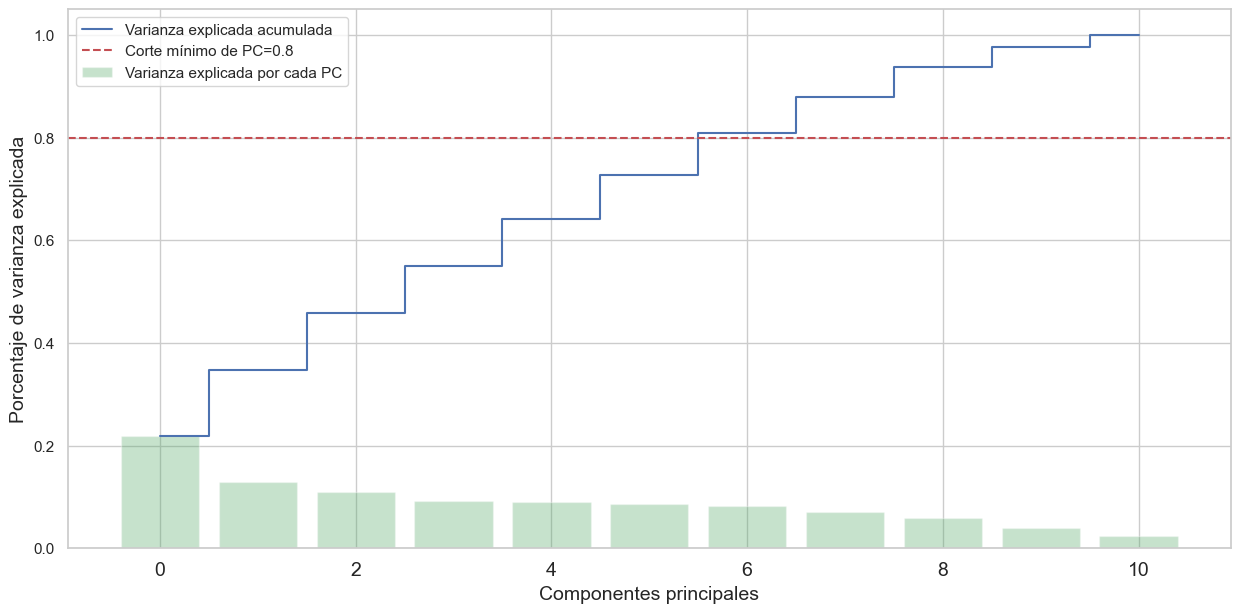

In [72]:
var_exp=pca.explained_variance_ratio_ # varianza explicada por cada PC
cum_var_exp = np.cumsum(var_exp) # varianza acumulada por los primeros n PCs
var_exp

paso = 1
linea_horizontal_y = 0.8

plt.figure(figsize=(15, 7))
plt.bar(np.arange(len(var_exp)), var_exp, alpha=0.3333, align='center', label='Varianza explicada por cada PC', color='g')
plt.step(np.arange(len(cum_var_exp)), cum_var_exp, where='mid', label='Varianza explicada acumulada')
plt.axhline(y=linea_horizontal_y, color='r', linestyle='--', label=f'Corte mínimo de PC={linea_horizontal_y}')
plt.ylabel('Porcentaje de varianza explicada')
plt.xlabel('Componentes principales')

plt.legend(loc='best')
plt.show()

En la gráfica anterior se puede apreciar lo dicho ya con anterioridad. Cada barra representa la explicación de la varianza total del dataset en cada componente principal. La líneas azules muestran escaladamente el porcentaje acumulado, en este caso, la varianza explicada acumulada por cada uno de los componentes principales. Se encuentra que, llegados al componente principal 6, ya se supera el tope mínimo de 80% definido por el problema. En este caso, se confirma que, para mantener al menos el 80% de la representación original, **se deben elegir los primeros 7 componentes principales**.

# **Punto 4: Clustering**

In [73]:
# Data
df_train_cl = pd.read_excel('df_train_final.xlsx', index_col='ID')
del(df_train_cl['Unnamed: 0'])

In [74]:
df_train_cl.head()

,Gender,Ever_Married,Graduated,Profession,Spending_Score,Var_1,Segmentation,Age,Work_Experience,Family_Size
ID,,,,,,,,,,
462809,Male,No,No,Healthcare,Low,Cat_4,D,22,1,4
462643,Female,Yes,Yes,Engineer,Average,Cat_4,A,38,3,3
466315,Female,Yes,Yes,Engineer,Low,Cat_6,B,67,1,1
461735,Male,Yes,Yes,Lawyer,High,Cat_6,B,67,0,2
462669,Female,Yes,Yes,Entertainment,High,Cat_6,A,40,2,6


## 4.1. Desarrollo de modelos

### 4.1.1. Selección de número de clusters: Aplicación método del codo

In [75]:
df_train_cl.head()

,Gender,Ever_Married,Graduated,Profession,Spending_Score,Var_1,Segmentation,Age,Work_Experience,Family_Size
ID,,,,,,,,,,
462809,Male,No,No,Healthcare,Low,Cat_4,D,22,1,4
462643,Female,Yes,Yes,Engineer,Average,Cat_4,A,38,3,3
466315,Female,Yes,Yes,Engineer,Low,Cat_6,B,67,1,1
461735,Male,Yes,Yes,Lawyer,High,Cat_6,B,67,0,2
462669,Female,Yes,Yes,Entertainment,High,Cat_6,A,40,2,6


In [76]:
df_train_cl.head()

,Gender,Ever_Married,Graduated,Profession,Spending_Score,Var_1,Segmentation,Age,Work_Experience,Family_Size
ID,,,,,,,,,,
462809,Male,No,No,Healthcare,Low,Cat_4,D,22,1,4
462643,Female,Yes,Yes,Engineer,Average,Cat_4,A,38,3,3
466315,Female,Yes,Yes,Engineer,Low,Cat_6,B,67,1,1
461735,Male,Yes,Yes,Lawyer,High,Cat_6,B,67,0,2
462669,Female,Yes,Yes,Entertainment,High,Cat_6,A,40,2,6


In [77]:
df_train_cl
df_train_cl_le = df_train_cl.copy()

In [78]:

label_encoders = {}

columns_to_encode = ['Gender', 'Ever_Married', 'Graduated', 'Profession', 'Spending_Score', 'Var_1','Segmentation']

# Iterar sobre las columnas y aplicar la transformación
for column in columns_to_encode:
    le = LabelEncoder()
    df_train_cl_le[column] = le.fit_transform(df_train_cl_le[column])
    label_encoders[column] = le
le=LabelEncoder()

df_train_cl_le.head()

,Gender,Ever_Married,Graduated,Profession,Spending_Score,Var_1,Segmentation,Age,Work_Experience,Family_Size
ID,,,,,,,,,,
462809,1,0,0,5,2,3,3,22,1,4
462643,0,1,1,2,0,3,0,38,3,3
466315,0,1,1,2,2,5,1,67,1,1
461735,1,1,1,7,1,5,1,67,0,2
462669,0,1,1,3,1,5,0,40,2,6


In [79]:
# Escalar las variables

data_encoded = pd.get_dummies(df_train_cl_le)
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_encoded)
data_scaled


array([[ 0.90916397, -1.18553194, -1.28233338, ..., -1.28462344,
        -0.50610533,  0.76479878],
       [-1.0999116 ,  0.84350321,  0.77982841, ..., -0.32715082,
         0.11144727,  0.09959863],
       [-1.0999116 ,  0.84350321,  0.77982841, ...,  1.40826831,
        -0.50610533, -1.23080166],
       ...,
       [-1.0999116 , -1.18553194,  0.77982841, ..., -0.62636101,
        -0.50610533, -1.23080166],
       [-1.0999116 , -1.18553194,  0.77982841, ..., -0.98541324,
        -0.50610533,  0.76479878],
       [ 0.90916397,  0.84350321,  0.77982841, ..., -0.38699286,
        -0.81488162,  0.09959863]])

C:\Users\Victus\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Victus\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Victus\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Victus\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Victus\anaconda3\lib\site-packages\sklearn\

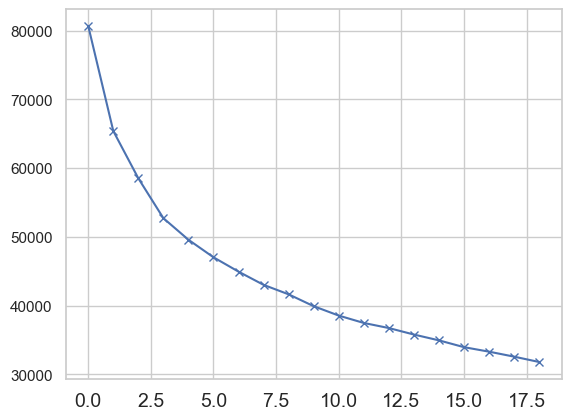

In [80]:
score_1 = []
range_values = range(1,20)

for i in range_values:
    kmeans = KMeans(n_clusters =i)
    kmeans.fit(data_scaled)
    score_1.append(kmeans.inertia_)
    
plt.plot(score_1, 'bx-')

**Interpretación:**

El método del "codo" (elbow method) es comúnmente utilizado para determinar el número óptimo de clusters k en k-means. Se busca el punto en la curva donde el cambio en la inercia  disminuye, después de generar la gráfica, se observa el punto de disminución de la inercia  donde se forma el codo, se evidencia el valor de k=3 como número optimo de clusters para el conjunto de datos.

### 4.1.2. Entrenamiento de modelo

In [81]:
N_clusters = 3
km_model = KMeans(n_clusters=N_clusters, random_state=0)


km_model.fit(data_scaled)
labels = km_model.predict(data_scaled)
df_train_cl['cluster_labels'] = labels

C:\Users\Victus\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


## 4.2. Interpretación de clusters

### 4.2.1. Variables Categoricas

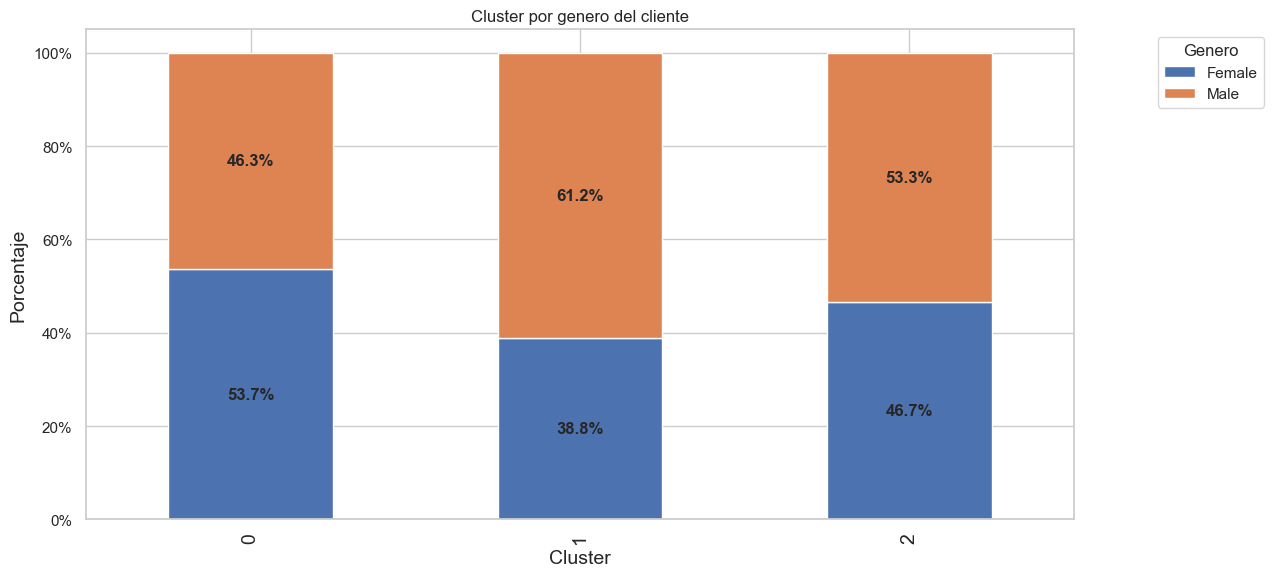

In [82]:
fig, ax1 = plt.subplots(figsize=(13, 6))
grouped1 = df_train_cl.groupby(['cluster_labels', 'Gender']).size().unstack()
grouped1 = grouped1.div(grouped1.sum(axis=1), axis=0)
ax1 = grouped1.plot(kind='bar', stacked=True, ax=ax1)
ax1.set_ylabel('Porcentaje')
ax1.set_xlabel('Cluster')
ax1.set_title('Cluster por genero del cliente')
for container in ax1.containers:
    ax1.bar_label(container, labels=[f'{val:.1%}' if val > 0 else '' for val in container.datavalues], 
                  label_type='center', fontweight='bold', fontsize=12)
legend1 = ax1.legend(loc='upper right', bbox_to_anchor=(1.2, 1))
legend1.set_title('Genero')
ax1.yaxis.set_major_formatter(mtick.PercentFormatter(1.0, decimals=0))
plt.tight_layout()
plt.show()

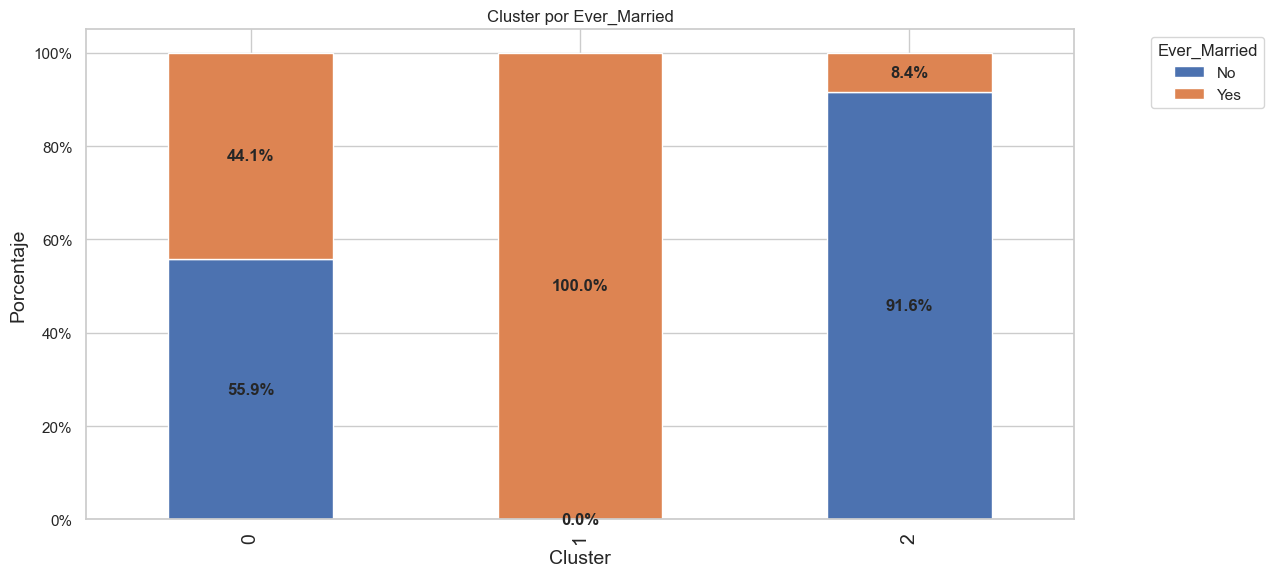

In [83]:
fig, ax1 = plt.subplots(figsize=(13, 6))
grouped1 = df_train_cl.groupby(['cluster_labels', 'Ever_Married']).size().unstack()
grouped1 = grouped1.div(grouped1.sum(axis=1), axis=0)
ax1 = grouped1.plot(kind='bar', stacked=True, ax=ax1)
ax1.set_ylabel('Porcentaje')
ax1.set_xlabel('Cluster')
ax1.set_title('Cluster por Ever_Married')
for container in ax1.containers:
    ax1.bar_label(container, labels=[f'{val:.1%}' if val > 0 else '' for val in container.datavalues], 
                  label_type='center', fontweight='bold', fontsize=12)
legend1 = ax1.legend(loc='upper right', bbox_to_anchor=(1.2, 1))
legend1.set_title('Ever_Married')
ax1.yaxis.set_major_formatter(mtick.PercentFormatter(1.0, decimals=0))
plt.tight_layout()
plt.show()

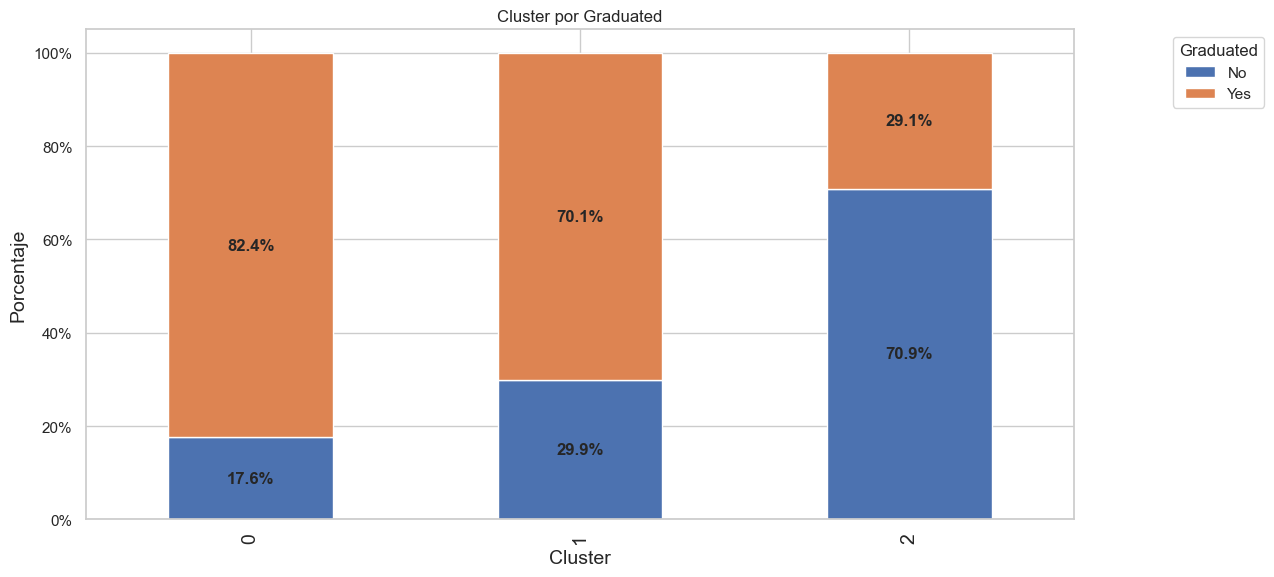

In [84]:
fig, ax1 = plt.subplots(figsize=(13, 6))
grouped1 = df_train_cl.groupby(['cluster_labels', 'Graduated']).size().unstack()
grouped1 = grouped1.div(grouped1.sum(axis=1), axis=0)
ax1 = grouped1.plot(kind='bar', stacked=True, ax=ax1)
ax1.set_ylabel('Porcentaje')
ax1.set_xlabel('Cluster')
ax1.set_title('Cluster por Graduated')
for container in ax1.containers:
    ax1.bar_label(container, labels=[f'{val:.1%}' if val > 0 else '' for val in container.datavalues], 
                  label_type='center', fontweight='bold', fontsize=12)
legend1 = ax1.legend(loc='upper right', bbox_to_anchor=(1.2, 1))
legend1.set_title('Graduated')
ax1.yaxis.set_major_formatter(mtick.PercentFormatter(1.0, decimals=0))
plt.tight_layout()
plt.show()

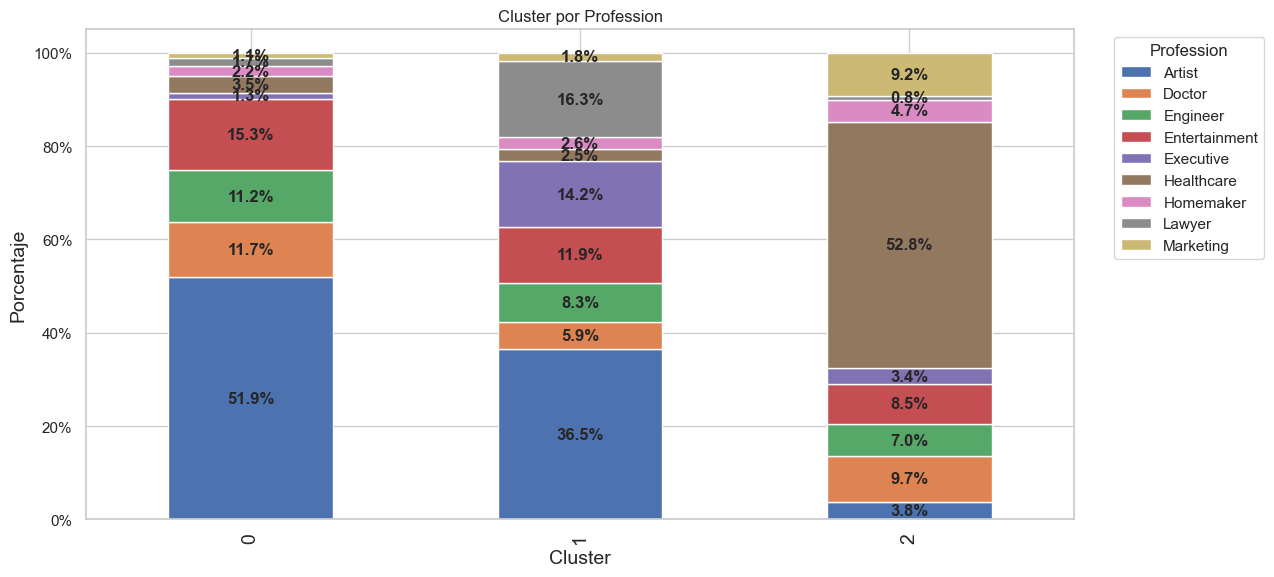

In [85]:
fig, ax1 = plt.subplots(figsize=(13, 6))
grouped1 = df_train_cl.groupby(['cluster_labels', 'Profession']).size().unstack()
grouped1 = grouped1.div(grouped1.sum(axis=1), axis=0)
ax1 = grouped1.plot(kind='bar', stacked=True, ax=ax1)
ax1.set_ylabel('Porcentaje')
ax1.set_xlabel('Cluster')
ax1.set_title('Cluster por Profession')
for container in ax1.containers:
    ax1.bar_label(container, labels=[f'{val:.1%}' if val > 0 else '' for val in container.datavalues], 
                  label_type='center', fontweight='bold', fontsize=12)
legend1 = ax1.legend(loc='upper right', bbox_to_anchor=(1.2, 1))
legend1.set_title('Profession')
ax1.yaxis.set_major_formatter(mtick.PercentFormatter(1.0, decimals=0))
plt.tight_layout()
plt.show()

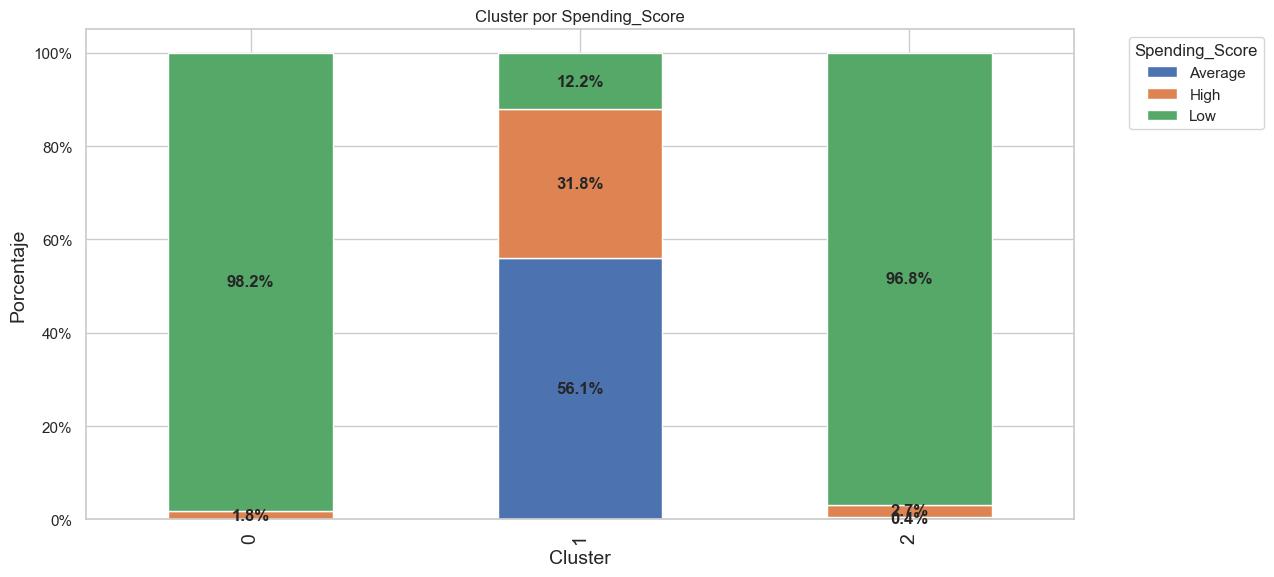

In [86]:
fig, ax1 = plt.subplots(figsize=(13, 6))
grouped1 = df_train_cl.groupby(['cluster_labels', 'Spending_Score']).size().unstack()
grouped1 = grouped1.div(grouped1.sum(axis=1), axis=0)
ax1 = grouped1.plot(kind='bar', stacked=True, ax=ax1)
ax1.set_ylabel('Porcentaje')
ax1.set_xlabel('Cluster')
ax1.set_title('Cluster por Spending_Score')
for container in ax1.containers:
    ax1.bar_label(container, labels=[f'{val:.1%}' if val > 0 else '' for val in container.datavalues], 
                  label_type='center', fontweight='bold', fontsize=12)
legend1 = ax1.legend(loc='upper right', bbox_to_anchor=(1.2, 1))
legend1.set_title('Spending_Score')
ax1.yaxis.set_major_formatter(mtick.PercentFormatter(1.0, decimals=0))
plt.tight_layout()
plt.show()

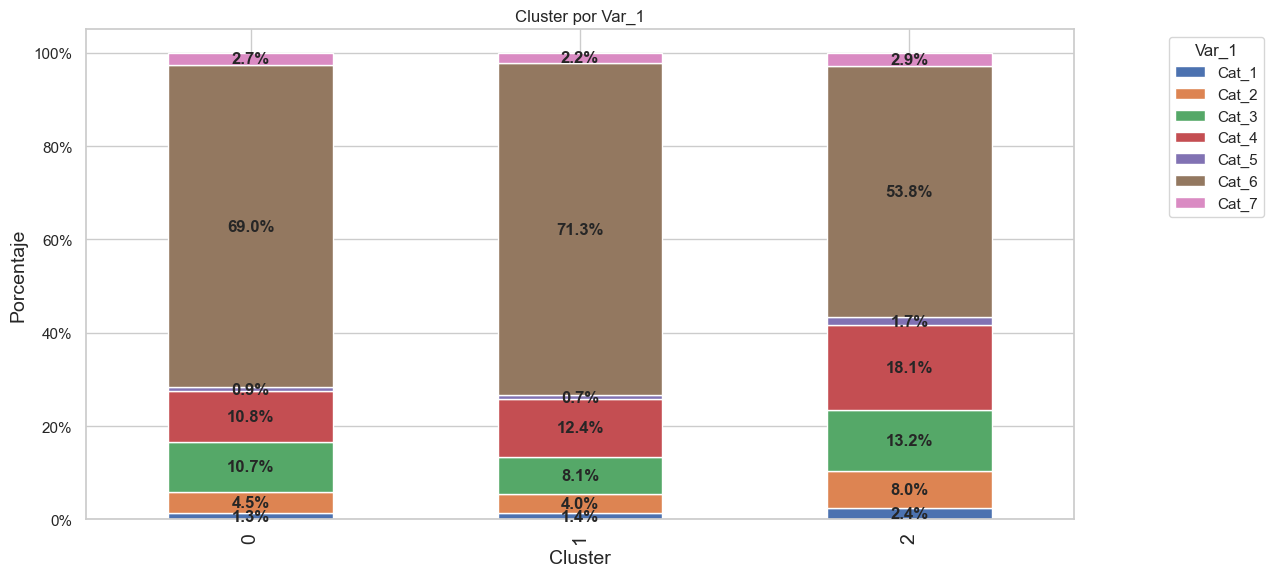

In [87]:
fig, ax1 = plt.subplots(figsize=(13, 6))
grouped1 = df_train_cl.groupby(['cluster_labels', 'Var_1']).size().unstack()
grouped1 = grouped1.div(grouped1.sum(axis=1), axis=0)
ax1 = grouped1.plot(kind='bar', stacked=True, ax=ax1)
ax1.set_ylabel('Porcentaje')
ax1.set_xlabel('Cluster')
ax1.set_title('Cluster por Var_1')
for container in ax1.containers:
    ax1.bar_label(container, labels=[f'{val:.1%}' if val > 0 else '' for val in container.datavalues], 
                  label_type='center', fontweight='bold', fontsize=12)
legend1 = ax1.legend(loc='upper right', bbox_to_anchor=(1.2, 1))
legend1.set_title('Var_1')
ax1.yaxis.set_major_formatter(mtick.PercentFormatter(1.0, decimals=0))
plt.tight_layout()
plt.show()

### 4.2.2. Variables Cuantitativas

C:\Windows\Temp\ipykernel_25576\1424171709.py:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax2 = sns.kdeplot(df_train_cl[df_train_cl['cluster_labels'] == 0]['Family_Size'], shade=True, color='blue')
C:\Windows\Temp\ipykernel_25576\1424171709.py:11: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax3 = sns.kdeplot(df_train_cl[df_train_cl['cluster_labels'] == 1]['Family_Size'], shade=True, color='orange')
C:\Windows\Temp\ipykernel_25576\1424171709.py:12: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax4 = sns.kdeplot(df_train_cl[df_train_cl['cluster_labels'] == 2]['Family_Size'], shade=True, color='green')
C:\Windows\Temp\ipykernel_25576\1424171709.py:13:

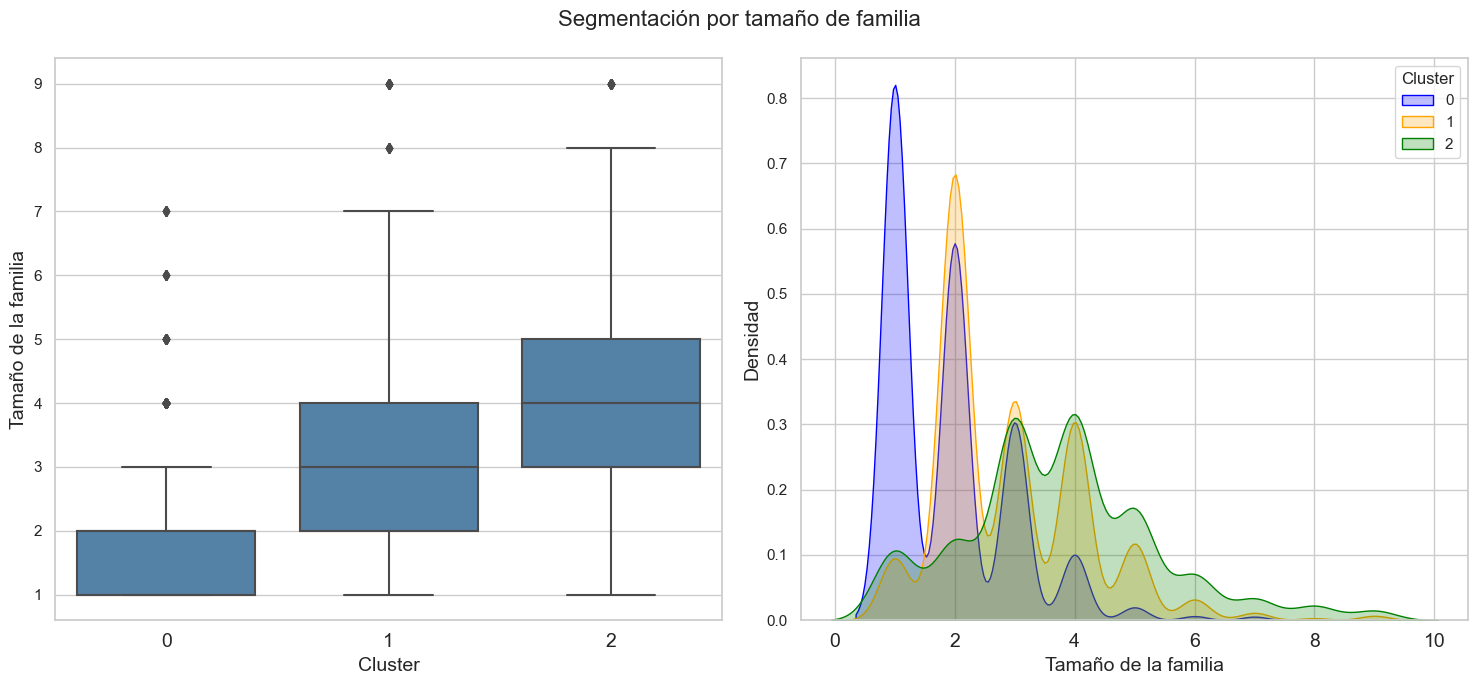

In [88]:
plt.figure(figsize=(15, 7))
plt.suptitle("Segmentación por tamaño de familia", fontsize=16)

plt.subplot(1, 2, 1)
ax = sns.boxplot(x=df_train_cl['cluster_labels'], y=df_train_cl['Family_Size'], color="steelblue")
plt.xlabel("Cluster")
plt.ylabel("Tamaño de la familia")

plt.subplot(1, 2, 2)
ax2 = sns.kdeplot(df_train_cl[df_train_cl['cluster_labels'] == 0]['Family_Size'], shade=True, color='blue')
ax3 = sns.kdeplot(df_train_cl[df_train_cl['cluster_labels'] == 1]['Family_Size'], shade=True, color='orange')
ax4 = sns.kdeplot(df_train_cl[df_train_cl['cluster_labels'] == 2]['Family_Size'], shade=True, color='green')
ax5 = sns.kdeplot(df_train_cl[df_train_cl['cluster_labels'] == 3]['Family_Size'], shade=True, color='grey')


plt.xlabel("Tamaño de la familia")
plt.ylabel("Densidad")
legend = plt.legend([0, 1, 2, 3])
legend.set_title('Cluster')
plt.tight_layout()
plt.show()

C:\Windows\Temp\ipykernel_25576\135671090.py:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax2 = sns.kdeplot(df_train_cl[df_train_cl['cluster_labels'] == 0]['Age'], shade=True, color='blue')
C:\Windows\Temp\ipykernel_25576\135671090.py:11: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax3 = sns.kdeplot(df_train_cl[df_train_cl['cluster_labels'] == 1]['Age'], shade=True, color='orange')
C:\Windows\Temp\ipykernel_25576\135671090.py:12: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax4 = sns.kdeplot(df_train_cl[df_train_cl['cluster_labels'] == 2]['Age'], shade=True, color='green')
C:\Windows\Temp\ipykernel_25576\135671090.py:13: FutureWarning: 

`shade` is

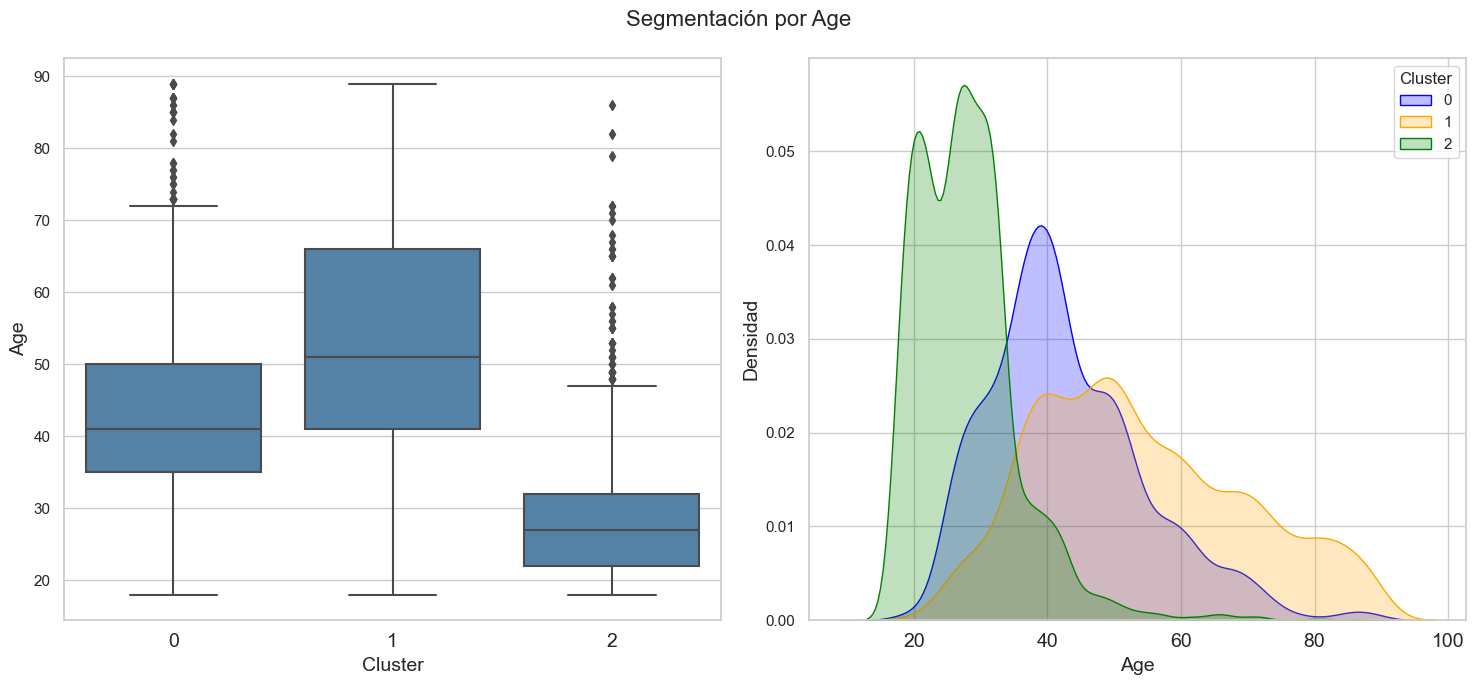

In [89]:
plt.figure(figsize=(15, 7))
plt.suptitle("Segmentación por Age", fontsize=16)

plt.subplot(1, 2, 1)
ax = sns.boxplot(x=df_train_cl['cluster_labels'], y=df_train_cl['Age'], color="steelblue")
plt.xlabel("Cluster")
plt.ylabel("Age")

plt.subplot(1, 2, 2)
ax2 = sns.kdeplot(df_train_cl[df_train_cl['cluster_labels'] == 0]['Age'], shade=True, color='blue')
ax3 = sns.kdeplot(df_train_cl[df_train_cl['cluster_labels'] == 1]['Age'], shade=True, color='orange')
ax4 = sns.kdeplot(df_train_cl[df_train_cl['cluster_labels'] == 2]['Age'], shade=True, color='green')
ax5 = sns.kdeplot(df_train_cl[df_train_cl['cluster_labels'] == 3]['Age'], shade=True, color='grey')


plt.xlabel("Age")
plt.ylabel("Densidad")
legend = plt.legend([0, 1, 2, 3])
legend.set_title('Cluster')
plt.tight_layout()
plt.show()

C:\Windows\Temp\ipykernel_25576\639129624.py:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax2 = sns.kdeplot(df_train_cl[df_train_cl['cluster_labels'] == 0]['Work_Experience'], shade=True, color='blue')
C:\Windows\Temp\ipykernel_25576\639129624.py:11: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax3 = sns.kdeplot(df_train_cl[df_train_cl['cluster_labels'] == 1]['Work_Experience'], shade=True, color='orange')
C:\Windows\Temp\ipykernel_25576\639129624.py:12: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax4 = sns.kdeplot(df_train_cl[df_train_cl['cluster_labels'] == 2]['Work_Experience'], shade=True, color='green')
C:\Windows\Temp\ipykernel_25576\63912962

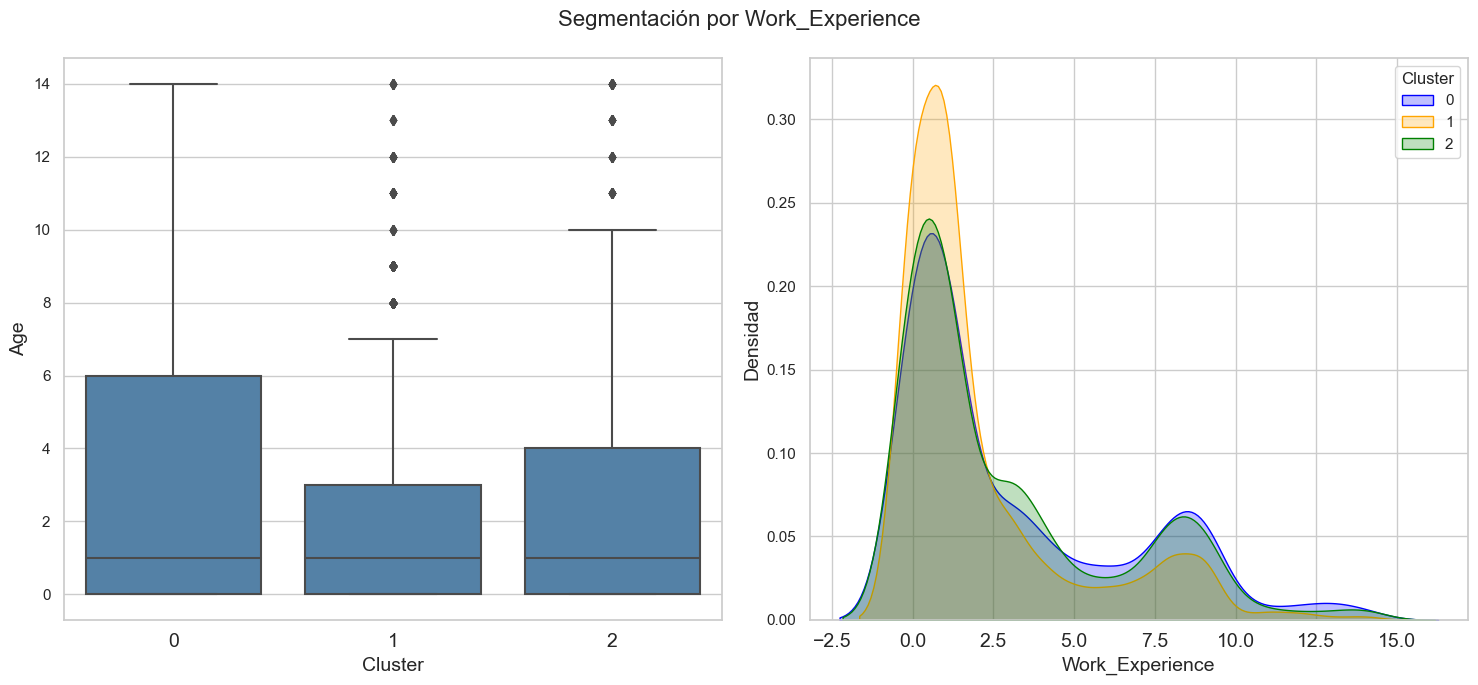

In [90]:
plt.figure(figsize=(15, 7))
plt.suptitle("Segmentación por Work_Experience", fontsize=16)

plt.subplot(1, 2, 1)
ax = sns.boxplot(x=df_train_cl['cluster_labels'], y=df_train_cl['Work_Experience'], color="steelblue")
plt.xlabel("Cluster")
plt.ylabel("Age")

plt.subplot(1, 2, 2)
ax2 = sns.kdeplot(df_train_cl[df_train_cl['cluster_labels'] == 0]['Work_Experience'], shade=True, color='blue')
ax3 = sns.kdeplot(df_train_cl[df_train_cl['cluster_labels'] == 1]['Work_Experience'], shade=True, color='orange')
ax4 = sns.kdeplot(df_train_cl[df_train_cl['cluster_labels'] == 2]['Work_Experience'], shade=True, color='green')
ax5 = sns.kdeplot(df_train_cl[df_train_cl['cluster_labels'] == 3]['Work_Experience'], shade=True, color='grey')


plt.xlabel("Work_Experience")
plt.ylabel("Densidad")
legend = plt.legend([0, 1, 2, 3])
legend.set_title('Cluster')
plt.tight_layout()
plt.show()

### 4.2.3. Caracterización

No se muestra una diferencia significativa en términos porcentuales en la distribuición de hombres y mujeres en los y tres clusters, sin embargo, es preciso anotar que el cluster 1 es el que tiene el mayor porcentaje de hombres (61.2%), mientras que el cluster 0 es el que tiene mayor porcentaje de mujeres (53.7%). 

En relación con la variable "Ever_Married", en el cluster 1, el 100% de los individuos se encentran casados, en el cluster 2 en la mayoría se encuentra no casado(91.6%), y el cluster 0 presenta una leve mayoría de no casados (55.9%). 

En el cluster 0 y 1 la mayoría de individuos se encuentran graduados, 82.4% y 70.1%, respectivamente, mientras que en el cluster 2, la mayoría de individuos se encuentran no graduados (70.9%). 

En los clusters 0 y 1, la profesión mayoritaría es "Artist", y en cluster 2, la profesión mayoritaría es "Healthcare". 

En relación con el Spending_Score, los clusters 0 y 2, mantienen en su mayoría individuos con "Low" Spending_Score, 98.2% y 96.8%, respectivamente, mientras que el cluster 1 concentra el mayor número de individuos con Spending_Score "High" (31.8%) y "Average" (56.1%). 

En relación con la variable Var_1, en todos los clusters se observa mayor presencia de individuos en "Cat_6" mientras que en el resto de categorías no se observan diferencias significativas. 

En relación con el tamaño de familia, el Cluster 2 concentra los individuos con mayor tamaño de familia, mientras el Cluster 0 concentra los individuos con menor tamaño de familia. 

En relación con la edad, en el cluster  2 concentra clientes con menor edad, y el cluster 1 concentra los clientes con mayor edad. 

Por último, en relación con "Work_Experience", en términos medianos no hay diferencias significativas en los años de experiencia de los clientes entre los clusters.